# **FIFA 21 Player Analysis**

## **1. Business Objective**

FIFA 21 is a football simulation video game developed by EA Vancouver as part of Electronic Arts’ FIFA series. As a football fan and game player, the aim of the project is to perform Exploratory Data Analysis on the dataset.

The dataset contains lot's of information, regarding players physical attributes as well as their wages, playing positions and national backgrounds. This provides us with wide variety of opportunities to analyze the correlations of different attributes, compute statistical quantities, representing the averages of characteristics needed, to become a professional player and so on. We also can apply supervised and unsupervised learning techniques to obtain new knowledge about the specifics of some groups of players as well as derive general conclusions of the dataset as a whole.




## **2. Data Collection**

The dataset has been obtained from kaggle. 

Link : https://www.kaggle.com/bryanb/fifa-player-stats-database


In [ ]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [ ]:
# Importing sklearn libraries needed

import re

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import MiniBatchKMeans, DBSCAN, OPTICS, AgglomerativeClustering, AffinityPropagation, SpectralClustering , MeanShift, estimate_bandwidth
from sklearn import metrics 
from scipy.spatial.distance import cdist

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modeling.

In [ ]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/FIFA 21 Dataset/FIFA21_official_data.csv"
fifa_data = pd.read_csv(file_path)

In [ ]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", fifa_data.shape[0])
print("The number of features are : ", fifa_data.shape[1])
print("The list of features is : ", fifa_data.columns)
fifa_data.head()

The number of records are :  17108
The number of features are :  65
The list of features is :  Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position',

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,€31.5M,€115K,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,6'0,190lbs,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,€87M,€370K,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,€63M,€195K,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,5'10,152lbs,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,NaN,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,€50.5M,€290K,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,"<span class=""pos pos23"">RW",7.0,"Jul 12, 2019",NaN,2024,5'9,161lbs,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,NaN,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,€22M,€41K,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,5'8,152lbs,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,NaN,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


Observations:

There are 17K+ players in the dataset with 60+ features. Some the features need bit of cleaning.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and dropping the unnecessary features that do not carry useful information.


#### **3.1.1 Dropping Irrelevant Features and Records**

Removing irrelevant features and records from the dataset.

In [ ]:
# There are many retired players in the dataset that needs to be removed.

filter = fifa_data["Release Clause"].isnull() & fifa_data["Contract Valid Until"].isnull()

In [ ]:
fifa_data = fifa_data[~filter]

In [ ]:
def CleanContractUntill(x):
    if not pd.isna(x):
        return int(x[-4:])

fifa_data["Contract Valid Until"] = fifa_data["Contract Valid Until"].apply(CleanContractUntill) 

In [ ]:
filter2 = (fifa_data["Release Clause"].isnull()) & (fifa_data["Contract Valid Until"] <= 2019)

In [ ]:
fifa_data = fifa_data[~filter2]

In [ ]:
filter3 = (fifa_data["Contract Valid Until"] < 2019) & (fifa_data["Overall"] <= 81)

In [ ]:
fifa_data = fifa_data[~filter3]

In [ ]:
filter4 = (fifa_data["DefensiveAwareness"].isnull()) & (fifa_data["Contract Valid Until"].isnull()) & (fifa_data["Contract Valid Until"] <= 2020)

In [ ]:
fifa_data = fifa_data[~filter4]

In [ ]:
filter5 = (fifa_data["DefensiveAwareness"].isnull()) & (fifa_data["Age"] >= 30)

In [ ]:
fifa_data = fifa_data[~filter5]

##### Using various filters on the raw data, I removed certain records of old retired players that could have disrupted our analysis.

In [ ]:
features_to_drop = ["ID", "Photo", "Flag", "Club Logo", "Special", "Body Type", "Real Face", "Jersey Number", "Joined", "Position", "Loaned From", "Contract Valid Until", "Release Clause"]

In [ ]:
# Dropping irrelevant features

fifa_data = fifa_data.drop(labels=features_to_drop, axis=1)

In [ ]:
# Dropping duplicate records

fifa_data = fifa_data.drop_duplicates()

In [ ]:
# Rearranging features

fifa_data = fifa_data[['Name', 'Nationality', 'Club', 'Age', 'Height', 'Weight', 'Value', 'Wage', 'Best Position', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                      'Skill Moves', 'Work Rate', 'Overall', 'Potential', 'Best Overall Rating', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                      'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                      'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                      'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']]

In [ ]:
# Sorting Dataframe based on "Overall" feature

fifa_data = fifa_data.sort_values(by=["Overall"], ascending=False, ignore_index=True)

#### **3.1.2 Feature Cleaning**

Cleaning features and extracting numeric values from string values.

In [ ]:
# Checking basic info of the dataset

missing_stats = []

for col in fifa_data.columns:
    missing_stats.append((col, fifa_data[col].nunique(), fifa_data[col].isnull().sum() / fifa_data.shape[0], fifa_data[col].value_counts(normalize=True, dropna=False).values[0], fifa_data[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,Name,15447,0.000000,0.000557,object
1,Nationality,166,0.000000,0.103973,object
2,Club,807,0.000000,0.002723,object
3,Age,30,0.000000,0.080641,int64
4,Height,21,0.000000,0.150761,object
5,Weight,56,0.000000,0.080641,object
6,Value,215,0.000000,0.029645,object
7,Wage,140,0.000000,0.148224,object
8,Best Position,15,0.000000,0.186162,object
9,Preferred Foot,2,0.000000,0.754549,object


In [ ]:
# Removing Numeric values from Name

fifa_data["Name"] = [re.sub('[0-9]', '', i) for i in fifa_data["Name"]]

In [ ]:
# Converting Market Value to numeric value (in M Euros)

def ExtractValueInMillionEuros(x):
    if 'M' in x:
        return float(re.findall("\d+", x)[0])
    elif 'K' in x:
        return float(re.findall("\d+", x)[0]) * (1000 / 1000000)
    else:
        return float(re.findall("\d+", x)[0]) / 1000000


fifa_data["Value"] = fifa_data["Value"].apply(ExtractValueInMillionEuros)

In [ ]:
# Converting Wages to numeric value (in K Euros)

def ExtractWageInThousandEuros(x):
    if 'K' in x:
        return float(re.findall("\d+", x)[0])
    else:
        return float(re.findall("\d+", x)[0]) / 1000


fifa_data["Wage"] = fifa_data["Wage"].apply(ExtractWageInThousandEuros)

In [ ]:
# Converting height from feet and inches to CM

def ConvertHeightToCM(x):
    h = x.split("'")
    h_inch = float(h[0]) * 12 + float(h[1])
    h_cm = round(h_inch * 2.54, 0)
    return h_cm

fifa_data["Height"] = fifa_data["Height"].apply(ConvertHeightToCM)

In [ ]:
# Converting Weights from lbs to KG

def ConvertWeightToKG(x):
    return round(float(re.findall("\d+", x)[0]) * 0.453592, 0)

fifa_data["Weight"] = fifa_data["Weight"].apply(ConvertWeightToKG)

In [ ]:
fifa_data.head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,L. Messi,Argentina,FC Barcelona,33,170.0,72.0,67.0,560.0,RW,Left,5.0,4.0,4.0,Medium/ Low,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,32.0
1,Cristiano Ronaldo,Portugal,Juventus,35,188.0,83.0,46.0,220.0,ST,Right,5.0,4.0,5.0,High/ Low,92,92,92.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,28.0
2,R. Lewandowski,Poland,FC Bayern München,31,183.0,80.0,80.0,240.0,ST,Right,4.0,4.0,4.0,High/ Medium,91,91,91.0,71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0
3,Neymar Jr,Brazil,Paris Saint-Germain,28,175.0,68.0,90.0,270.0,LW,Right,5.0,5.0,5.0,High/ Medium,91,91,91.0,85.0,87.0,62.0,87.0,87.0,95.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,NaN,30.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0
4,J. Oblak,Slovenia,Atlético Madrid,27,188.0,87.0,75.0,125.0,GK,Right,3.0,3.0,1.0,Medium/ Medium,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0


#### **3.1.3 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [ ]:
fifa_data.isna().mean()

Name                        0.000000
Nationality                 0.000000
Club                        0.000000
Age                         0.000000
Height                      0.000000
Weight                      0.000000
Value                       0.000000
Wage                        0.000000
Best Position               0.000000
Preferred Foot              0.000000
International Reputation    0.000000
Weak Foot                   0.000000
Skill Moves                 0.000000
Work Rate                   0.000000
Overall                     0.000000
Potential                   0.000000
Best Overall Rating         0.000000
Crossing                    0.000000
Finishing                   0.000000
HeadingAccuracy             0.000000
ShortPassing                0.000000
Volleys                     0.000000
Dribbling                   0.000000
Curve                       0.000000
FKAccuracy                  0.000000
LongPassing                 0.000000
BallControl                 0.000000
A

In [ ]:
# Since "Marking" has 98% missing values, there is no use for us to keep it. We can drop the feature from the dataset.

fifa_data = fifa_data.drop(["Marking"], axis=1)

In [ ]:
# Checking rows with missing values in feature "Club"

fifa_data[fifa_data["DefensiveAwareness"].isnull()].head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
84,Y. Brahimi,Algeria,FC Porto,28,175.0,66.0,39.0,30.0,RW,Right,3.0,3.0,4.0,High/ Medium,85,85,83.0,79.0,76.0,46.0,79.0,73.0,93.0,84.0,78.0,72.0,86.0,87.0,75.0,92.0,84.0,90.0,69.0,72.0,85.0,49.0,76.0,46.0,38.0,83.0,79.0,75.0,90.0,36.0,25.0,13.0,16.0,12.0,7.0,7.0,NaN
227,Malcom,Brazil,FC Barcelona,21,173.0,74.0,31.0,140.0,CAM,Left,2.0,4.0,4.0,Medium/ Medium,82,89,82.0,79.0,75.0,57.0,80.0,71.0,85.0,77.0,81.0,73.0,85.0,87.0,82.0,92.0,79.0,84.0,85.0,58.0,74.0,64.0,85.0,53.0,26.0,78.0,81.0,68.0,78.0,28.0,17.0,8.0,14.0,15.0,7.0,9.0,NaN
454,Y. Rakitskyi,Ukraine,Shakhtar Donetsk,28,185.0,83.0,12.0,2.0,CDM,Left,2.0,3.0,3.0,High/ Medium,80,80,80.0,68.0,57.0,69.0,78.0,53.0,69.0,75.0,77.0,84.0,73.0,69.0,72.0,68.0,76.0,73.0,87.0,74.0,82.0,84.0,86.0,84.0,82.0,53.0,75.0,50.0,78.0,83.0,81.0,12.0,16.0,7.0,12.0,6.0,NaN
484,Alexandre Pato,Brazil,Tianjin Quanjian FC,28,180.0,81.0,15.0,30.0,CF,Right,3.0,4.0,4.0,High/ Low,80,80,78.0,68.0,80.0,69.0,75.0,75.0,81.0,81.0,70.0,53.0,80.0,84.0,85.0,83.0,78.0,69.0,76.0,78.0,67.0,72.0,73.0,63.0,29.0,79.0,66.0,74.0,74.0,23.0,19.0,16.0,7.0,13.0,15.0,8.0,NaN
550,E. Sala,Argentina,FC Nantes,27,188.0,83.0,13.0,30.0,ST,Right,2.0,3.0,3.0,High/ High,79,79,78.0,59.0,82.0,84.0,71.0,77.0,75.0,72.0,41.0,63.0,76.0,56.0,61.0,59.0,80.0,55.0,79.0,77.0,92.0,84.0,75.0,75.0,62.0,84.0,63.0,73.0,81.0,59.0,51.0,7.0,11.0,7.0,9.0,7.0,NaN


Text(0.5, 0, ' ')

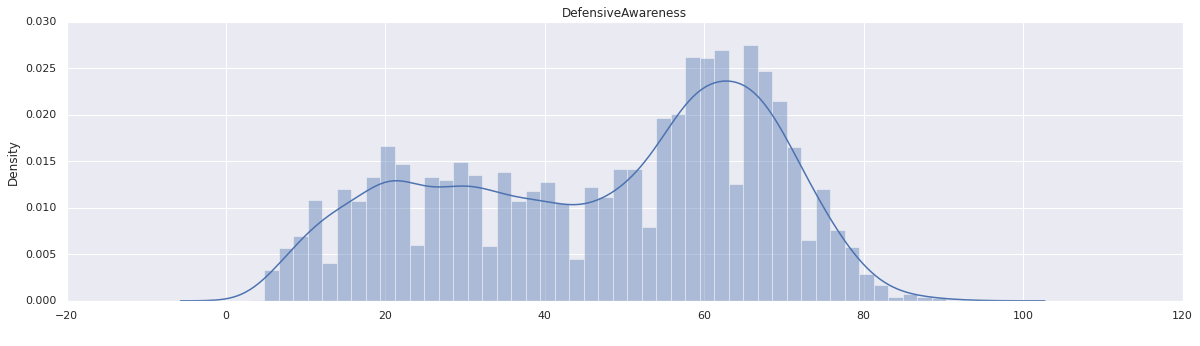

In [ ]:
# Checking feature "DefensiveAwareness"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["DefensiveAwareness"], bins=50 , ax=ax1)
ax1.set_title("DefensiveAwareness")
ax1.set_xlabel(" ")

In [ ]:
da_by_position = fifa_data.groupby(by=["Best Position"]).median()
da_by_position = da_by_position[["DefensiveAwareness"]]
da_by_position.columns = ["DefensiveAwareness_Median"]

In [ ]:
da_by_position = da_by_position.reset_index()

In [ ]:
fifa_data = pd.merge(fifa_data, da_by_position, how="left", on=["Best Position"])

In [ ]:
# Filling the missing values with median value for respective position
 
fifa_data["DefensiveAwareness"].fillna(fifa_data["DefensiveAwareness_Median"], inplace=True)

In [ ]:
comp_by_position = fifa_data.groupby(by=["Best Position"]).median()
comp_by_position = comp_by_position[["Composure"]]
comp_by_position.columns = ["Compusure_Median"]

In [ ]:
comp_by_position = comp_by_position.reset_index()

In [ ]:
fifa_data = pd.merge(fifa_data, comp_by_position, how="left", on=["Best Position"])

In [ ]:
# Filling the missing values with median value for respective position
 
fifa_data["Composure"].fillna(fifa_data["Compusure_Median"], inplace=True)

In [ ]:
fifa_data = fifa_data.drop(["DefensiveAwareness_Median", "Compusure_Median"], axis=1)

#### **3.1.4 Cleaning records**

Some of the records have incorrect positions listed that needs to be corrected for better prediction.

In [ ]:
position_map = {'CAM':"AM", 'CB':"CB", 'CDM':"DM", 'CF':"ST", 'CM':"CM", 'GK':"GK", 'LB':"LB", 'LM':"LW", 'LW':"LW", 'LWB':"LB",
                'RB':"RB", 'RM':"RW", 'RW':"RW", 'RWB':"RB", 'ST':"ST"}

In [ ]:
# Clubbed few positions to reduce grouping

fifa_data["Best Position"] = fifa_data["Best Position"].map(position_map)

In [ ]:
# Correcting the position of some top players

fifa_data.at[104, "Best Position"] = "DM"
fifa_data.at[75, "Best Position"] = "LW"
fifa_data.at[211, "Best Position"] = "RB"
fifa_data.at[1, "Best Position"] = "LW"
fifa_data.at[30, "Best Position"] = "RW"
fifa_data.at[64, "Best Position"] = "ST"
fifa_data.at[76, "Best Position"] = "RW"
fifa_data.at[171, "Best Position"] = "LW"
fifa_data.at[467, "Best Position"] = "LB"
fifa_data.at[58, "Best Position"] = "CM"
fifa_data.at[400, "Best Position"] = "CM"
fifa_data.at[284, "Best Position"] = "CM"
fifa_data.at[346, "Best Position"] = "CM"
fifa_data.at[477, "Best Position"] = "CM"
fifa_data.at[493, "Best Position"] = "LW"
fifa_data.at[129, "Best Position"] = "DM"
fifa_data.at[130, "Best Position"] = "DM"
fifa_data.at[207, "Best Position"] = "DM"
fifa_data.at[49, "Club"] = 'Manchester United'

In [ ]:
position_category = {'RW': "Forward", 'LW': "Forward", 'ST': "Forward", 'GK': "Goalkeeper", 'AM': "Midfielder", 'CB': "Defender", 'DM': "Midfielder", 'CM': "Midfielder", 'LB': "Defender", 'RB': "Defender"}
fifa_data["Position"] = fifa_data["Best Position"].map(position_category)

In [ ]:
fifa_data = fifa_data[['Name', 'Nationality', 'Club', 'Age', 'Height', 'Weight', 'Value',
       'Wage','Position', 'Best Position', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Overall', 'Potential',
       'Best Overall Rating', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'DefensiveAwareness']]

In [ ]:
fifa_data['Improvement Scope'] = fifa_data['Potential'] - fifa_data['Overall']

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [ ]:
# Checking the different "Nationality" in the dataset

fifa_data["Nationality"].value_counts()

England                     1680
Germany                     1136
Spain                       1073
France                       958
Argentina                    748
Brazil                       705
Italy                        517
Netherlands                  438
Portugal                     345
Mexico                       343
United States                335
Poland                       298
Uruguay                      293
Japan                        288
Scotland                     280
Belgium                      277
Colombia                     275
Norway                       263
Republic of Ireland          260
Austria                      245
Sweden                       244
Denmark                      237
Turkey                       235
Switzerland                  202
Chile                        183
Romania                      175
Paraguay                     161
Venezuela                    148
Croatia                      146
Korea Republic               143
Australia 

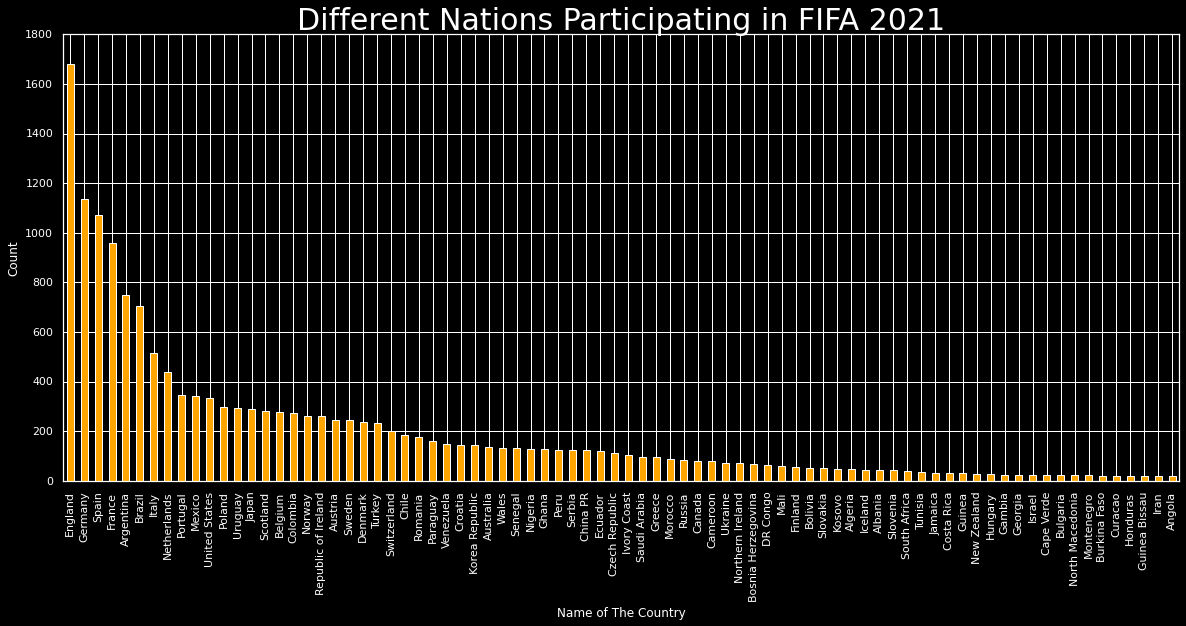

In [ ]:
plt.style.use('dark_background')
fifa_data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 8))
plt.title('Different Nations Participating in FIFA 2021', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('Count')
plt.show()

In [ ]:
# Checking the different "Nationality" in the dataset

fifa_data["Club"].value_counts()

AS Monaco            44
Chelsea              43
Arsenal              41
Tottenham Hotspur    41
Crystal Palace       41
                     ..
Carpi                 1
GIF Sundsvall         1
FC Rostov             1
Monarcas Morelia      1
Padova                1
Name: Club, Length: 807, dtype: int64

Text(0.5, 0, ' ')

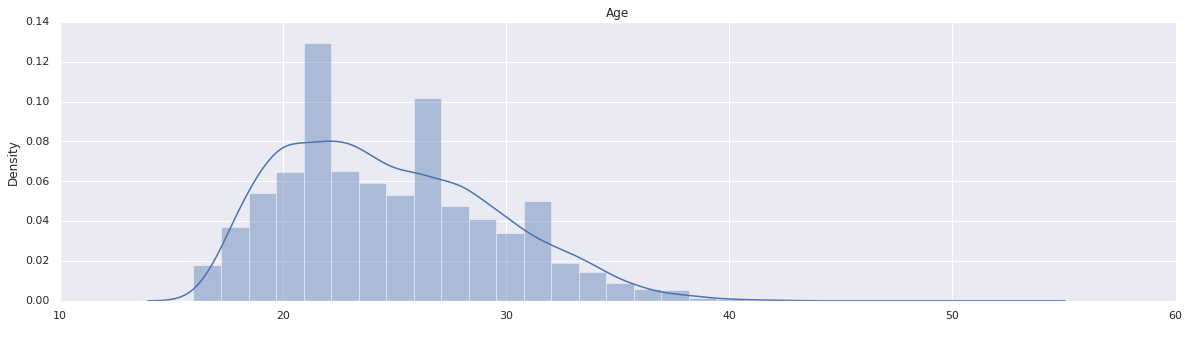

In [ ]:
# Checking feature "Age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["Age"], bins=30 , ax=ax1)
ax1.set_title("Age")
ax1.set_xlabel(" ")

##### Obserations:
1. Most of the players lie in the range of 20-30 which is the peak age group of professional football players. 


Text(0.5, 0, ' ')

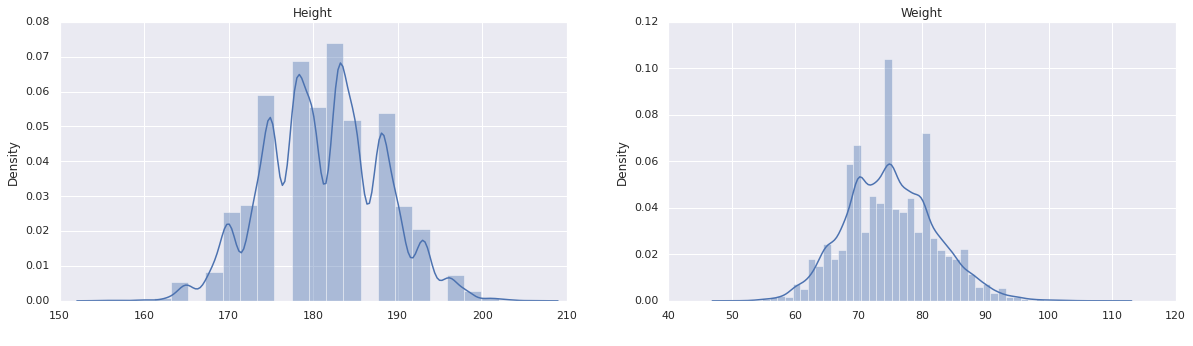

In [ ]:
# Checking feature "Age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_objects

sns.distplot(fifa_data["Height"], bins=25 , ax=ax1)
ax1.set_title("Height")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Weight"], bins=50 , ax=ax2)
ax2.set_title("Weight")
ax2.set_xlabel(" ")

##### Observations:
1. Most of the players have the height in the range of 175cm to 185cm.
2. Most of the players have the weight in the range of 70kg to 80kg.

Text(0.5, 0, ' ')

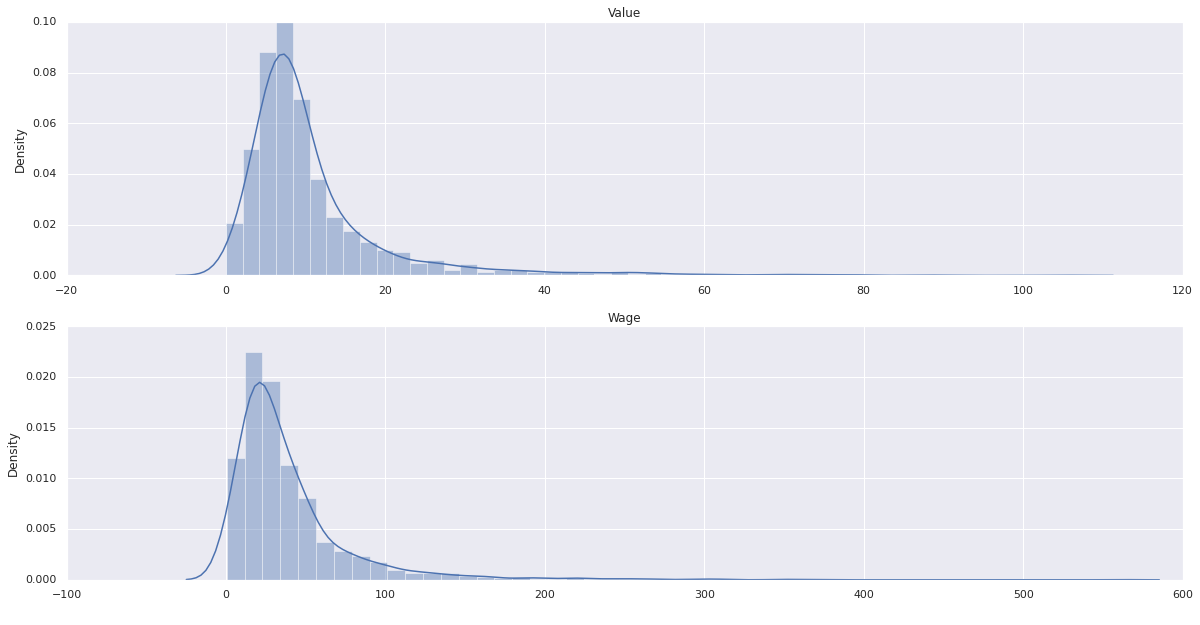

In [ ]:
# Checking feature "Value" and "Wage"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
fig, (ax1, ax2) = plot_objects

sns.distplot(fifa_data.iloc[0:2500]["Value"], bins=50 , ax=ax1)
ax1.set_title("Value")
ax1.set_xlabel(" ")

sns.distplot(fifa_data.iloc[0:2500]["Wage"], bins=50 , ax=ax2)
ax2.set_title("Wage")
ax2.set_xlabel(" ")

##### Observations:
1. Since there are around 16K+ players, the features "Value" and "Wage" would be highly skewed, therefore, taking top 500 players based on "Overall"
2. "Value" indicates that most the top players market value lies in between 10M Euros to 40M Euros
3. "Wages" seems to have a right skewed distribution. Most of the players have wages in between 0.5K Euros to 560K Euros

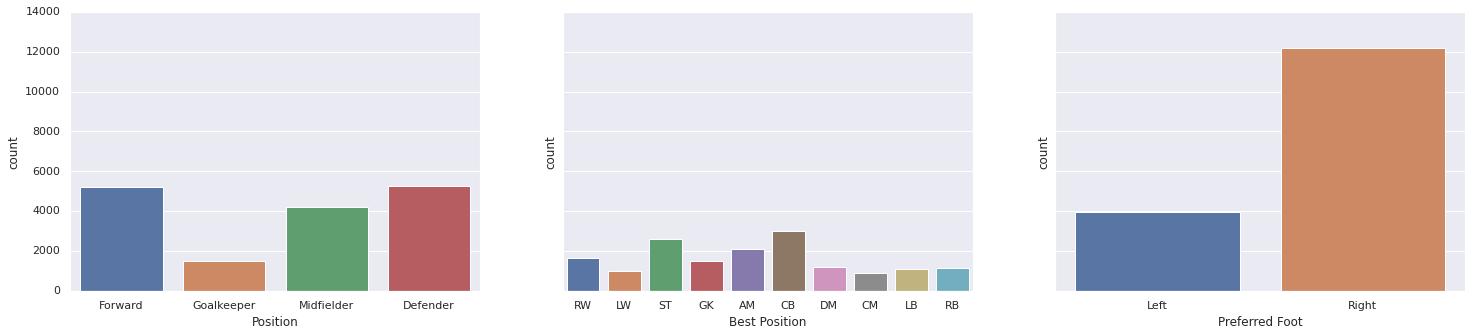

In [ ]:
# Plotting the countplot for the "Position"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)

sns.countplot("Position", data=fifa_data, ax=axes[0])
sns.countplot("Best Position", data=fifa_data, ax=axes[1])
sns.countplot("Preferred Foot", data=fifa_data, ax=axes[2])

##### Observations:
1. There are more than 5000+ "Defenders" in the dataset, followed by Forwards, Midfielders and Goalkeepers.
2. "CB" are the highest in the dataset, the reason could be due to the fact that a team plays 2 or 3 CBs in a match.
3. "ST" are the second-highest sections of players present in the dataset.
4. Majority of the player's preferred foot is "Right".


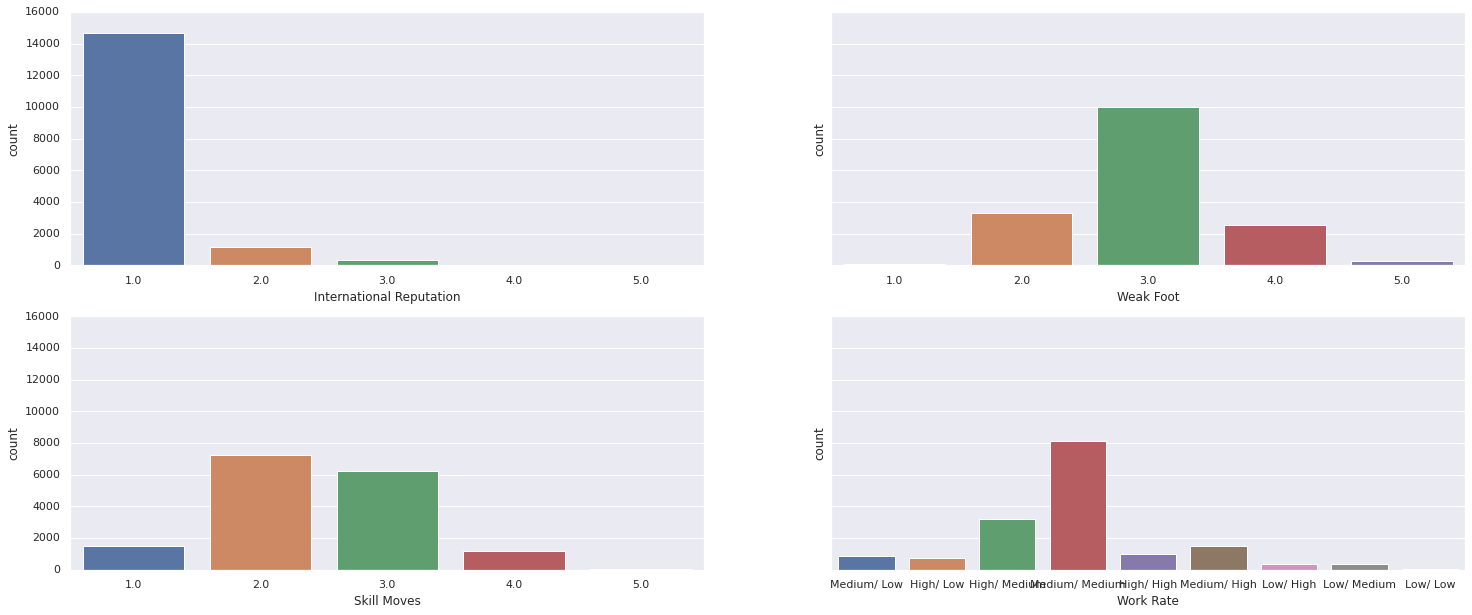

In [ ]:
# Plotting the countplot for the "International Reputation", "Weak Foot", "Skill Moves" and "Work Rate" 

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharey=True)
sns.countplot("International Reputation", data=fifa_data, ax=axes[0,0])
sns.countplot("Weak Foot", data=fifa_data, ax=axes[0,1])
sns.countplot("Skill Moves", data=fifa_data, ax=axes[1,0])
sns.countplot("Work Rate", data=fifa_data, ax=axes[1,1])

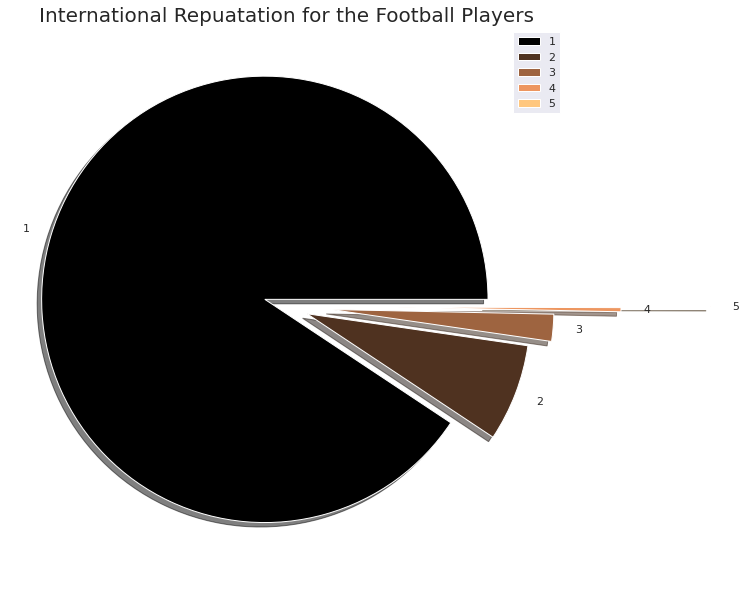

In [ ]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = fifa_data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

##### Observations:
1. Due to large set of players, over 14K+ players have the lowest "internation reputation" of 1.
2. Majority of the players have rating of 3 as "Weak Foot" which means neutral.
3. Rating of 2 and 3 are most common for "Skill Moves"
4. Medium/Medium is the most common "Work Rate"


Text(0.5, 0, ' ')

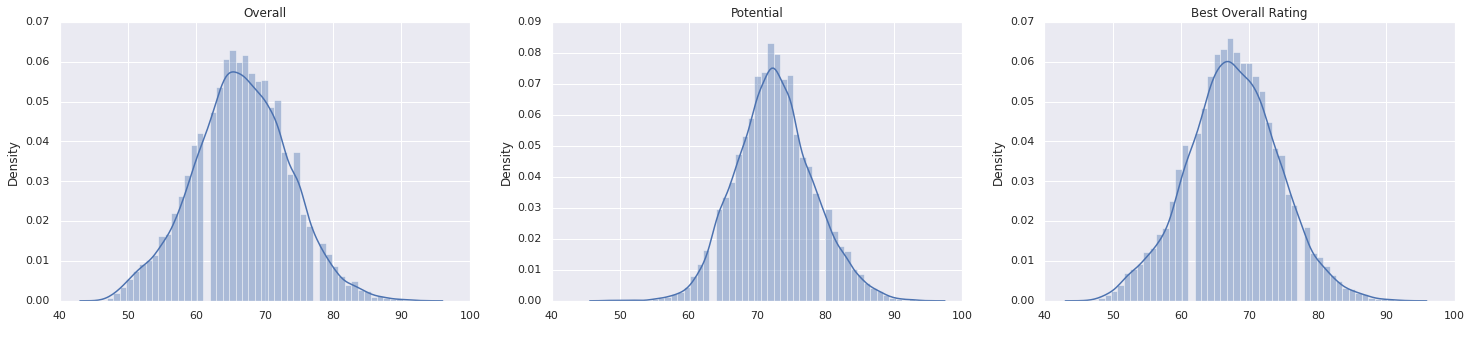

In [ ]:
# Checking feature "Overall", "Potential", "Best Overall Rating"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Overall"], bins=50 , ax=ax1)
ax1.set_title("Overall")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Potential"], bins=50 , ax=ax2)
ax2.set_title("Potential")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Best Overall Rating"], bins=50 , ax=ax3)
ax3.set_title("Best Overall Rating")
ax3.set_xlabel(" ")

##### Observations:
1. The distribution seems to be normal for all three features.
2. Majority of the players rating is around ~70.


Text(0.5, 0, ' ')

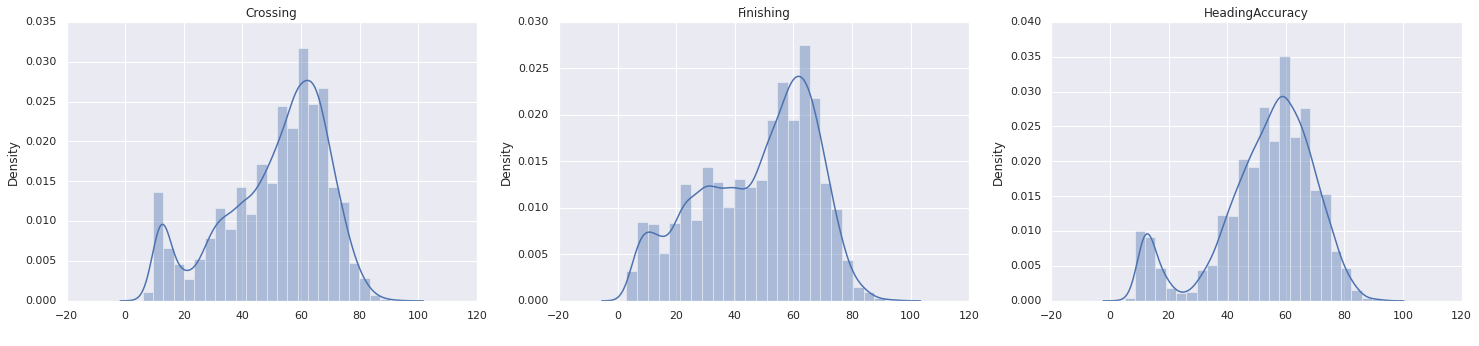

In [ ]:
# Checking features "Crossing", "Finishing", "HeadingAccuracy"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Crossing"], bins=25 , ax=ax1)
ax1.set_title("Crossing")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Finishing"], bins=25 , ax=ax2)
ax2.set_title("Finishing")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["HeadingAccuracy"], bins=25 , ax=ax3)
ax3.set_title("HeadingAccuracy")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

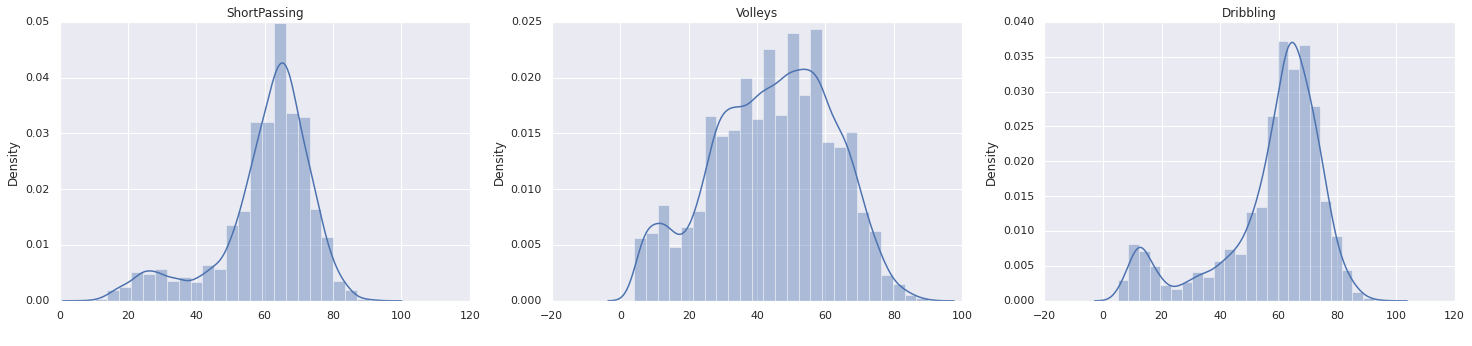

In [ ]:
# Checking features "ShortPassing", "Volleys", "Dribbling"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["ShortPassing"], bins=25 , ax=ax1)
ax1.set_title("ShortPassing")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Volleys"], bins=25 , ax=ax2)
ax2.set_title("Volleys")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Dribbling"], bins=25 , ax=ax3)
ax3.set_title("Dribbling")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

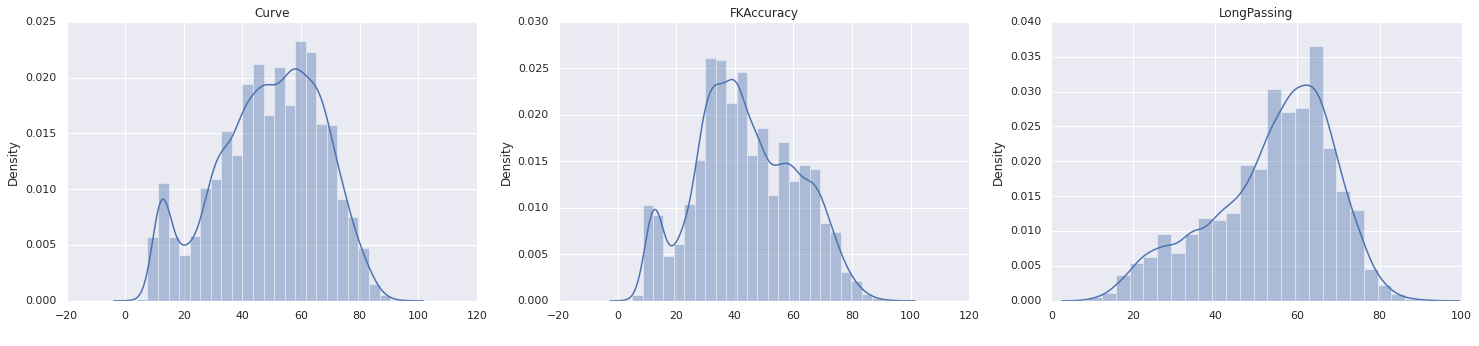

In [ ]:
# Checking features "Curve", "FKAccuracy", "LongPassing"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Curve"], bins=25 , ax=ax1)
ax1.set_title("Curve")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["FKAccuracy"], bins=25 , ax=ax2)
ax2.set_title("FKAccuracy")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["LongPassing"], bins=25 , ax=ax3)
ax3.set_title("LongPassing")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

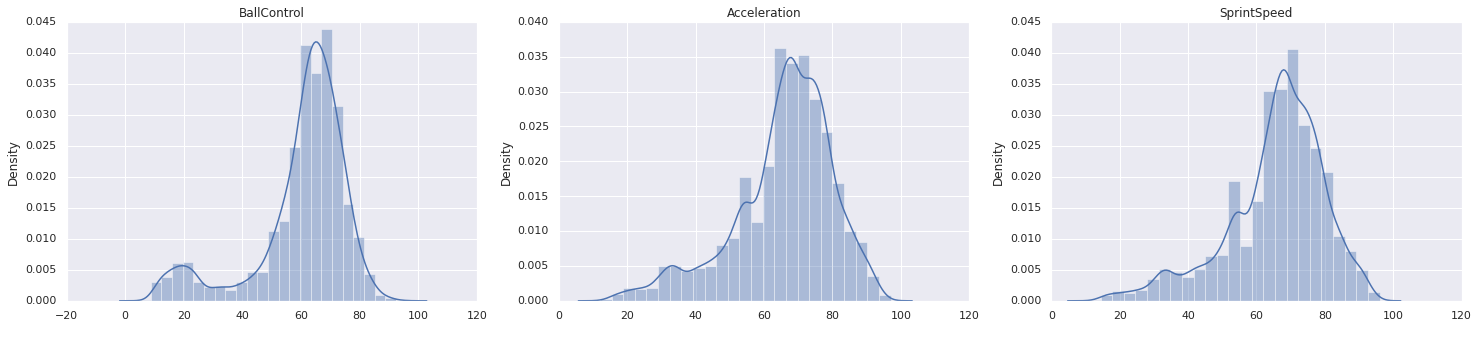

In [ ]:
# Checking features "BallControl", "Acceleration", "SprintSpeed"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["BallControl"], bins=25 , ax=ax1)
ax1.set_title("BallControl")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Acceleration"], bins=25 , ax=ax2)
ax2.set_title("Acceleration")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["SprintSpeed"], bins=25 , ax=ax3)
ax3.set_title("SprintSpeed")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

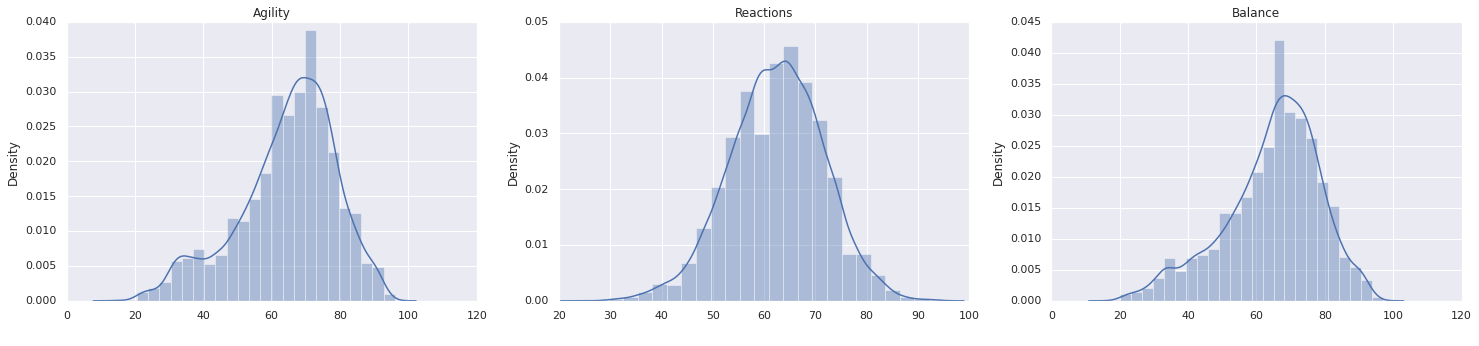

In [ ]:
# Checking features "Agility", "Reactions", "Balance"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Agility"], bins=25 , ax=ax1)
ax1.set_title("Agility")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Reactions"], bins=25 , ax=ax2)
ax2.set_title("Reactions")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Balance"], bins=25 , ax=ax3)
ax3.set_title("Balance")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

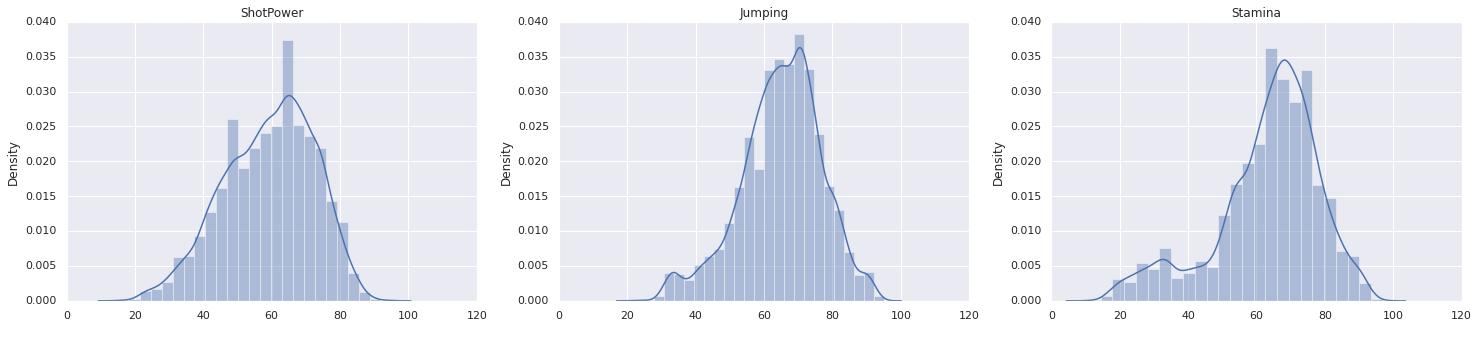

In [ ]:
# Checking features "ShotPower", "Jumping", "Stamina"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["ShotPower"], bins=25 , ax=ax1)
ax1.set_title("ShotPower")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Jumping"], bins=25 , ax=ax2)
ax2.set_title("Jumping")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Stamina"], bins=25 , ax=ax3)
ax3.set_title("Stamina")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

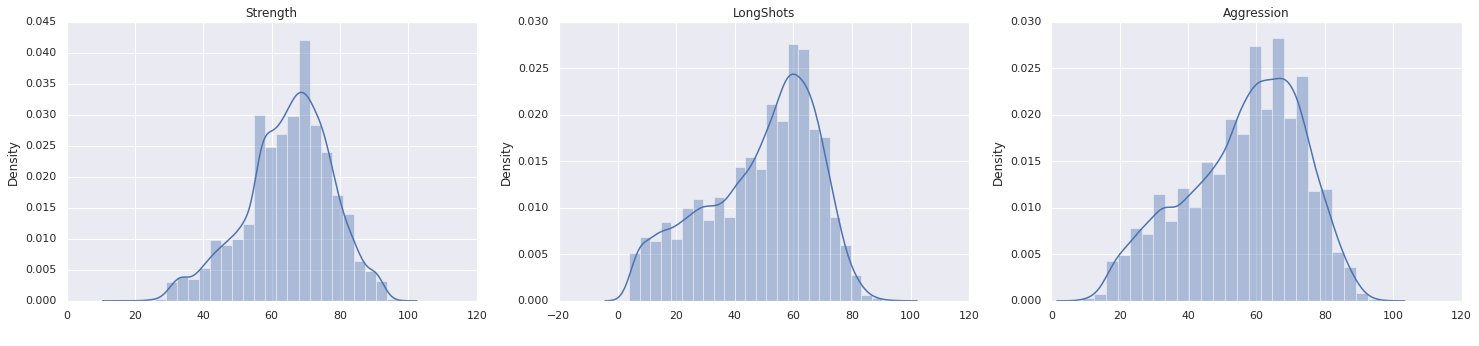

In [ ]:
# Checking features "Strength", "LongShots", "Aggression"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Strength"], bins=25 , ax=ax1)
ax1.set_title("Strength")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["LongShots"], bins=25 , ax=ax2)
ax2.set_title("LongShots")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Aggression"], bins=25 , ax=ax3)
ax3.set_title("Aggression")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

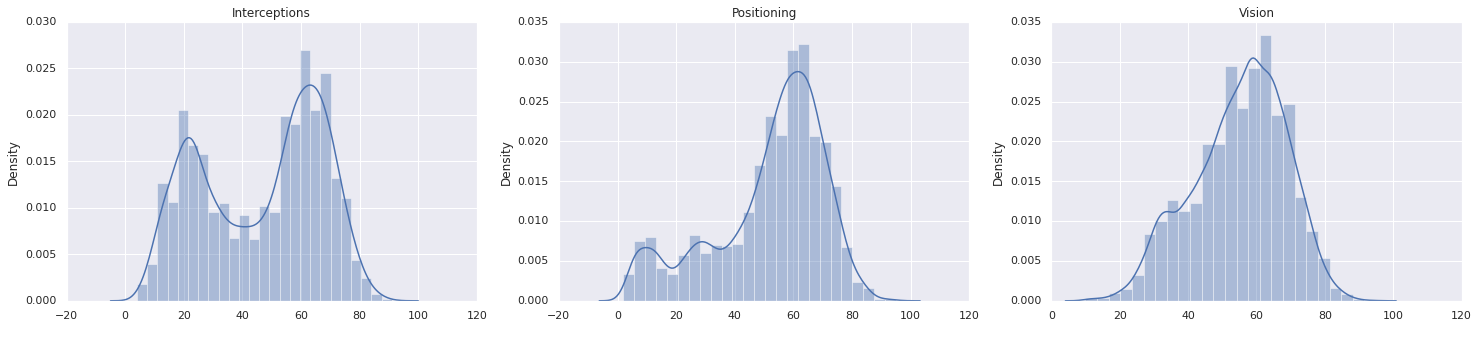

In [ ]:
# Checking features "Interceptions", "Positioning", "Vision"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Interceptions"], bins=25 , ax=ax1)
ax1.set_title("Interceptions")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Positioning"], bins=25 , ax=ax2)
ax2.set_title("Positioning")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Vision"], bins=25 , ax=ax3)
ax3.set_title("Vision")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

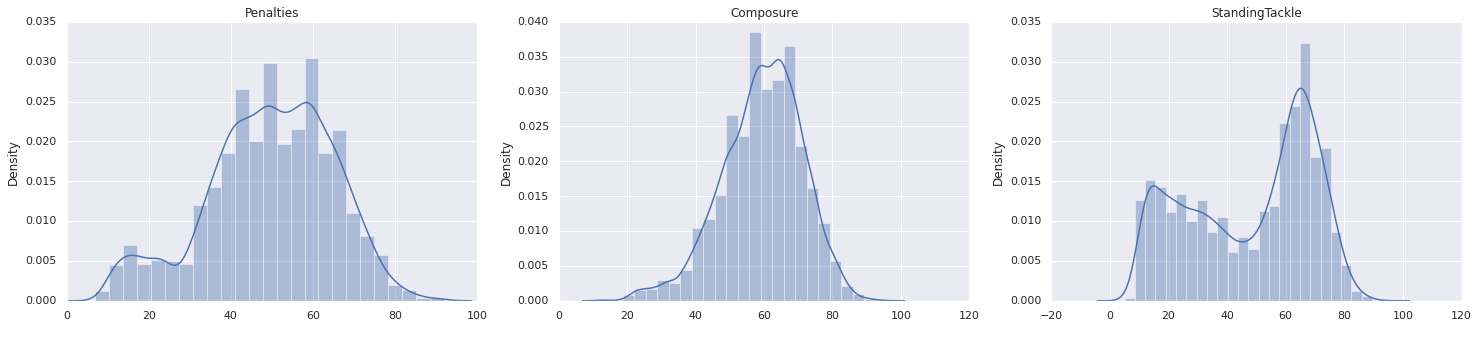

In [ ]:
# Checking features "Penalties", "Composure", "StandingTackle"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Penalties"], bins=25 , ax=ax1)
ax1.set_title("Penalties")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Composure"], bins=25 , ax=ax2)
ax2.set_title("Composure")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["StandingTackle"], bins=25 , ax=ax3)
ax3.set_title("StandingTackle")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

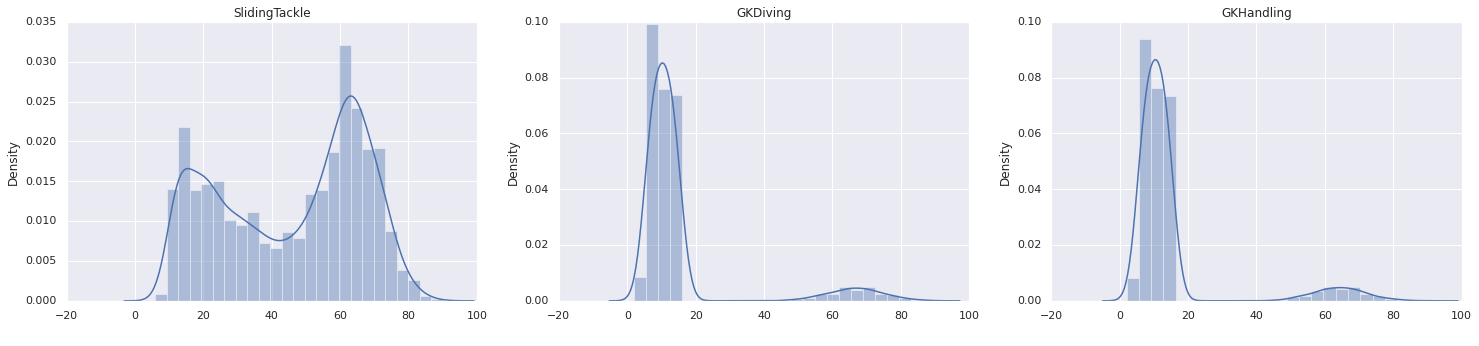

In [ ]:
# Checking features "SlidingTackle", "GKDiving", "GKHandling"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["SlidingTackle"], bins=25 , ax=ax1)
ax1.set_title("SlidingTackle")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["GKDiving"], bins=25 , ax=ax2)
ax2.set_title("GKDiving")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["GKHandling"], bins=25 , ax=ax3)
ax3.set_title("GKHandling")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

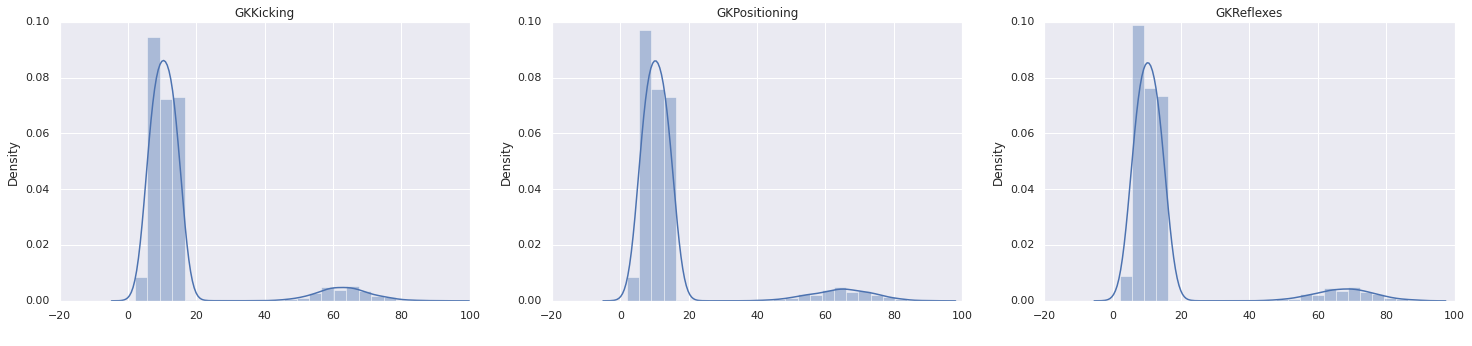

In [ ]:
# Checking features "GKKicking", "GKPositioning", "GKReflexes"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["GKKicking"], bins=25 , ax=ax1)
ax1.set_title("GKKicking")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["GKPositioning"], bins=25 , ax=ax2)
ax2.set_title("GKPositioning")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["GKReflexes"], bins=25 , ax=ax3)
ax3.set_title("GKReflexes")
ax3.set_xlabel(" ")

Text(0.5, 0, ' ')

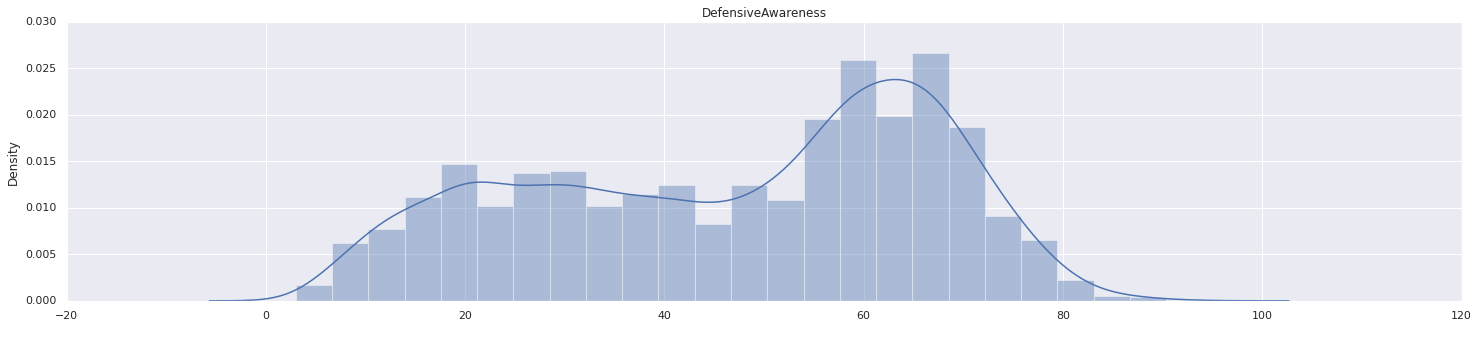

In [ ]:
# Checking feature "DefensiveAwareness"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["DefensiveAwareness"], bins=25 , ax=ax1)
ax1.set_title("DefensiveAwareness")
ax1.set_xlabel(" ")

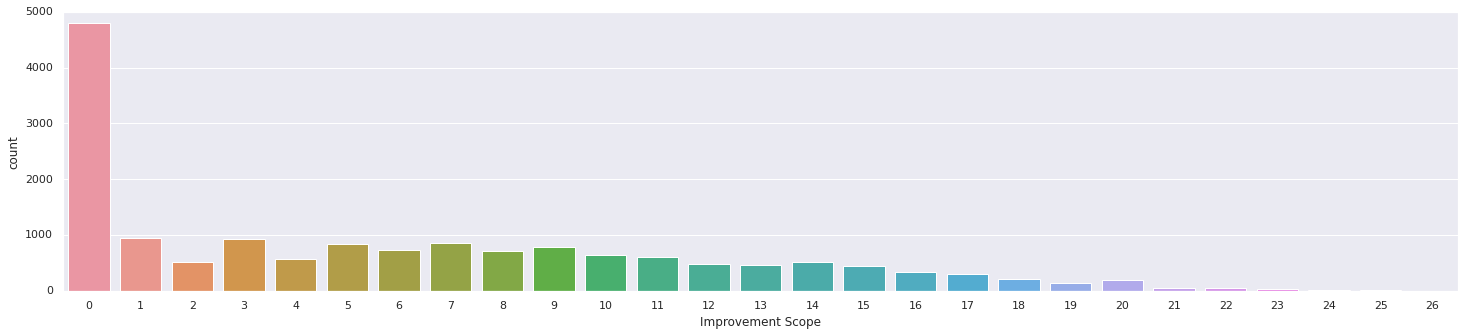

In [ ]:
# Plotting the countplot for the "Improvement Scope"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("Improvement Scope", data=fifa_data, ax=axes)

##### Observations:
1. There are many players who have a good potential for the future.
2. All the attributes have a normal looking distribution with range 60-80 being the most common values for different attributes.


### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns. 

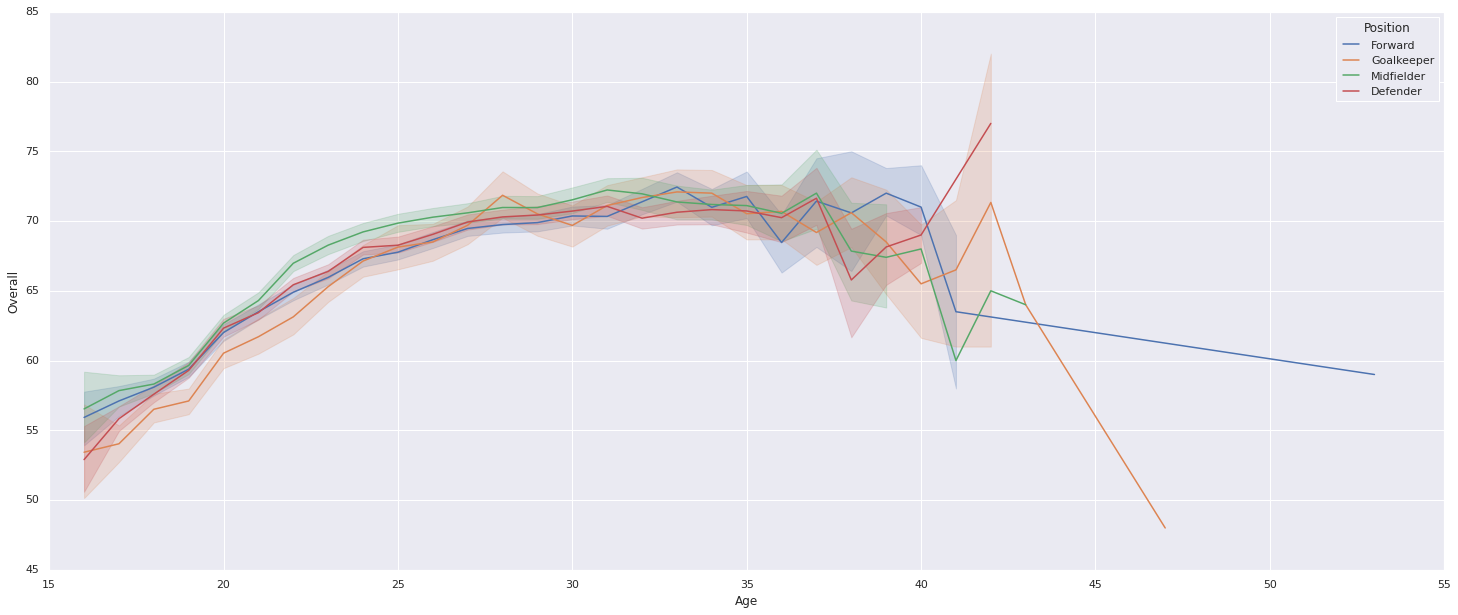

In [ ]:
# Checking the trend of Overall for each main position with Age 

fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(x="Age", y="Overall", hue="Position", data=fifa_data, ax=ax);

Observations:
1. The players tend to improve with age untill 30 which is considered to be threshold of a athlete's career, post this the average ratings tend to decline.
2. Out of the 4 positions, "Goalkeepers", seems to improve till 30 and remain same till 35 and then their ratings decline.
3. "Defenders" seems to decline earlier as compared to other positions.

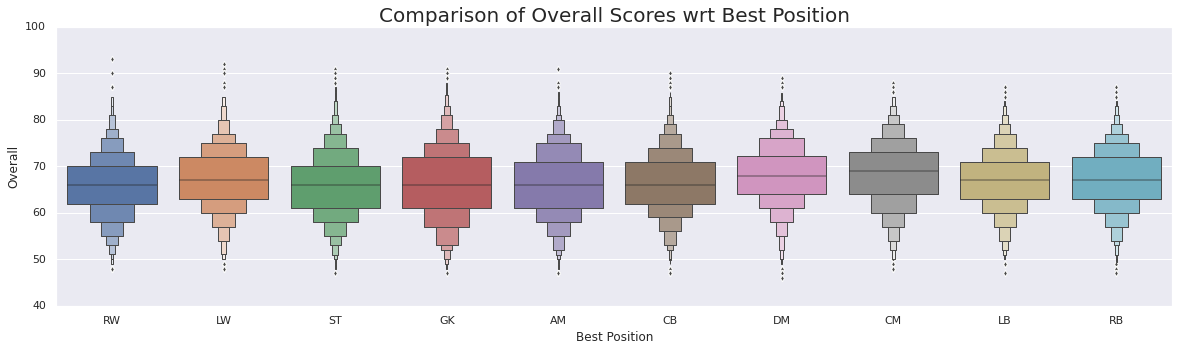

In [ ]:
# Comparison of Overall Scores wrt Best Position

plt.rcParams['figure.figsize'] = (20, 5)
sns.boxenplot(fifa_data['Best Position'], fifa_data['Overall'])
plt.title('Comparison of Overall Scores wrt Best Position', fontsize = 20)
plt.show()

##### Observations:
1. The average Overall score for all position is similar.


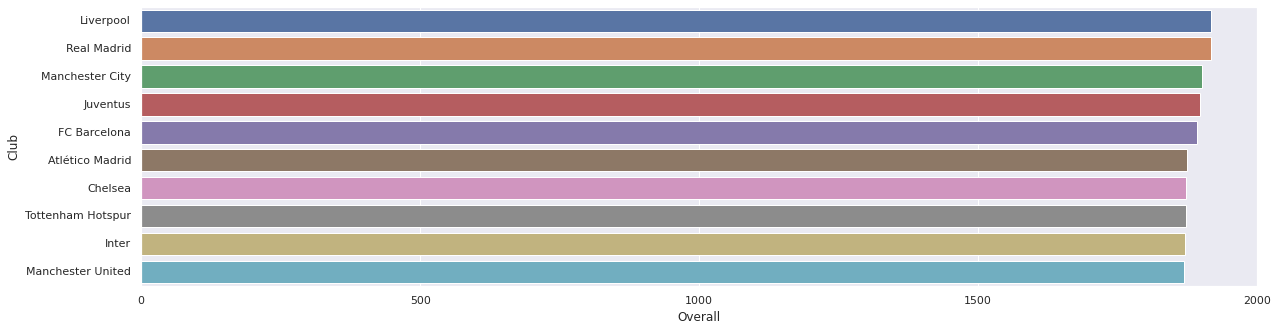

In [ ]:
# Top Clubs based on Overalls

top_clubs = fifa_data.groupby(by=["Club"])["Overall"].nlargest(23).sum(level=0).reset_index().sort_values(by="Overall", ascending=False).head(10)
sns.barplot(y='Club', x='Overall', data=top_clubs)

Observations:
1. I took 23 players as the baseline, as usually a club has 20-25 players in their squad for the season.
2. While checking the top clubs, Liverpool came out to be the best team followed by Real Madrid and Manchester City.
3. Surprisingly UCL 2020 winner Bayern Munich didn't make it into top 10.

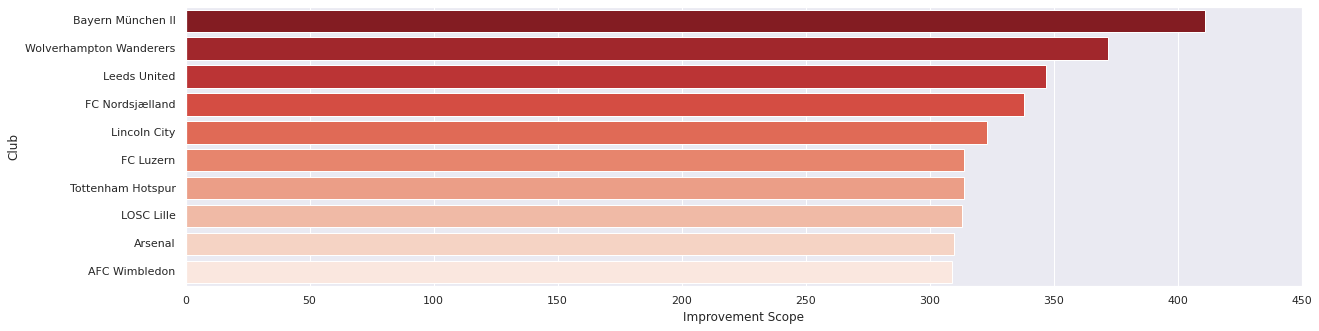

In [ ]:
# Clubs with high improvement potential

top_clubs_to_improve = fifa_data.groupby(by=['Club'])['Improvement Scope'].sum().reset_index().sort_values(by=["Improvement Scope"], ascending=False).head(10)
sns.barplot(y='Club', x='Improvement Scope', data=top_clubs_to_improve, palette=sns.color_palette("Reds_r", 10));

Observations:
1. Major clubs like Tottenham Hotspur and Arsenal are playing under potential. Their squad can become better in the future.
2. Teams like Wolves, Bayern Munchen II, Leeds and Lille have many players with high potenital.


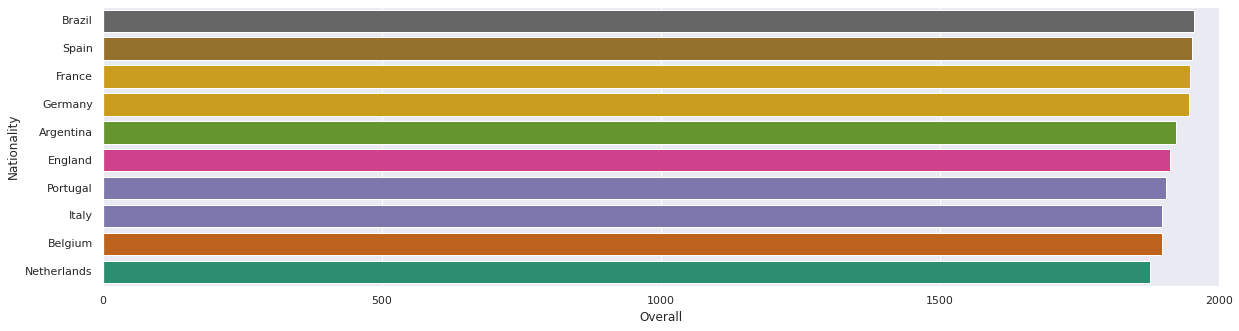

In [ ]:
# Top international team based on top 23 players

top_nations = fifa_data.groupby(by=["Nationality"])["Overall"].nlargest(23).sum(level=0).reset_index().sort_values(by="Overall", ascending=False).head(10)
sns.barplot(y='Nationality', x='Overall', data=top_nations, palette=sns.color_palette("Dark2_r", 10));

Observations:
1. 23 which is the usual squad strength was selected to calculate the top national team.
2. Brazil, Spain, France and Germany seems to be the top national teams.

In [ ]:
# Best player for each position with their age, club, and nationality based on their Overall score

fifa_data.iloc[fifa_data.groupby(fifa_data['Best Position'])['Overall'].idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall']]

,Best Position,Name,Age,Club,Nationality,Overall
5,AM,K. De Bruyne,29,Manchester City,Belgium,91
9,CB,V. van Dijk,28,Liverpool,Netherlands,90
19,CM,T. Kroos,30,Real Madrid,Germany,88
12,DM,Casemiro,28,Real Madrid,Brazil,89
4,GK,J. Oblak,27,Atlético Madrid,Slovenia,91
36,LB,A. Robertson,26,Liverpool,Scotland,87
1,LW,Cristiano Ronaldo,35,Juventus,Portugal,92
41,RB,T. Alexander-Arnold,21,Liverpool,England,87
0,RW,L. Messi,33,FC Barcelona,Argentina,93
2,ST,R. Lewandowski,31,FC Bayern München,Poland,91


In [ ]:
# Best player for each position with their age, club, and nationality based on their Imporvement Score

fifa_data.iloc[fifa_data.groupby(fifa_data['Best Position'])['Improvement Scope'].idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall', 'Potential']]

,Best Position,Name,Age,Club,Nationality,Overall,Potential
14556,AM,O. Babuscu,16,FC Admira Wacker Mödling,Austria,58,83
13644,CB,B. Arrey-Mbi,17,Bayern München II,Germany,60,86
16075,CM,H. Burrows,18,Peterborough United,England,49,72
15896,DM,T. Owusu,17,FC Luzern,Switzerland,51,75
14536,GK,C. Boyce-Clarke,17,Reading,England,58,82
15934,LB,L. Florică,17,FC Hermannstadt,Romania,51,75
15496,LW,R. Richards,16,West Bromwich Albion,England,54,80
15426,RB,S. Wallner,18,FC Zürich,Switzerland,54,77
14613,RW,U. Vasic,17,FC Thun,Switzerland,57,80
14525,ST,W. Faghir,16,Vejle Boldklub,Denmark,58,83


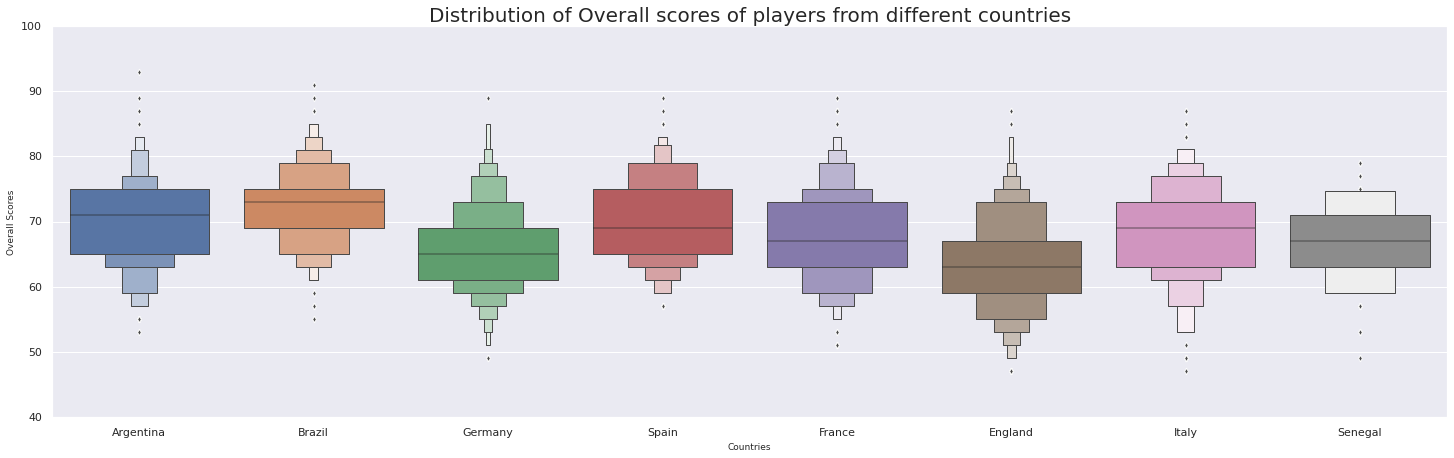

In [ ]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'France', 'Italy', 'Brazil', 'Argentina', 'Senegal', 'India')
data_countries = fifa_data.loc[fifa_data['Nationality'].isin(some_countries) & fifa_data['Overall']]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['Overall'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of Overall scores of players from different countries', fontsize = 20)
plt.show()

##### Observations:
1. Brazil has the highest average among the top national teams


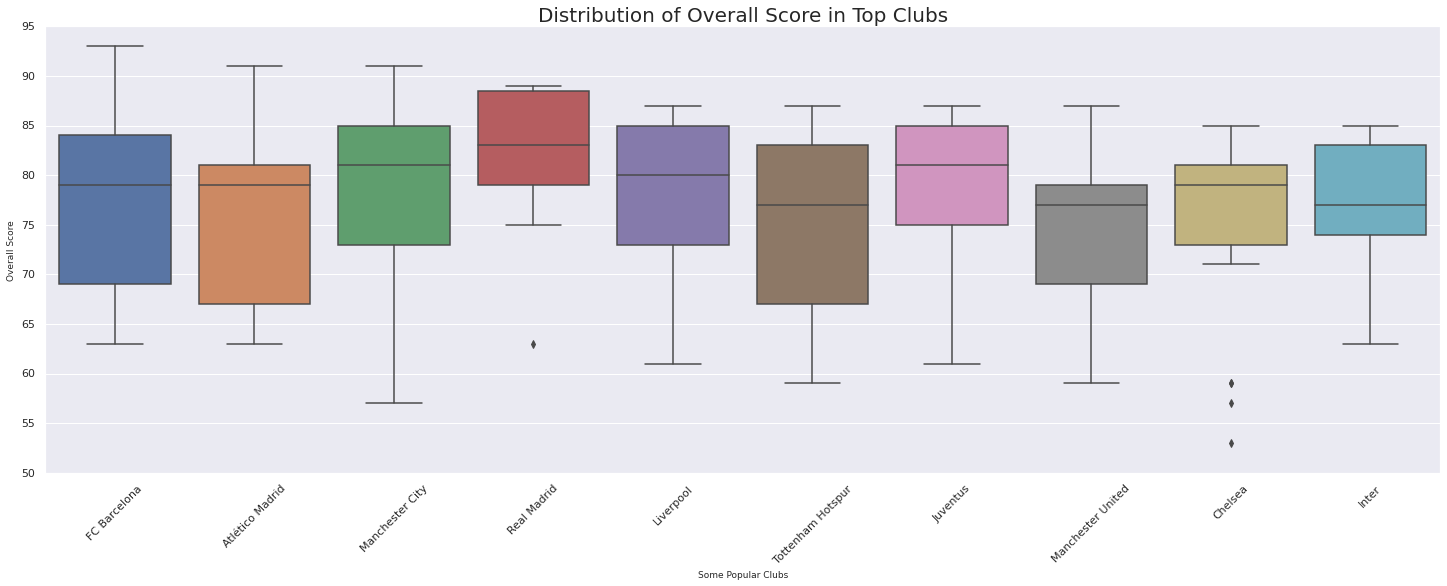

In [ ]:
# Distribution of Overall Score in top Clubs

some_clubs = top_clubs["Club"].values
data_clubs = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['Overall']]

plt.rcParams['figure.figsize'] = (25, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'])
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Top Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. Real Madrid has the highest average Overall score among the top teams


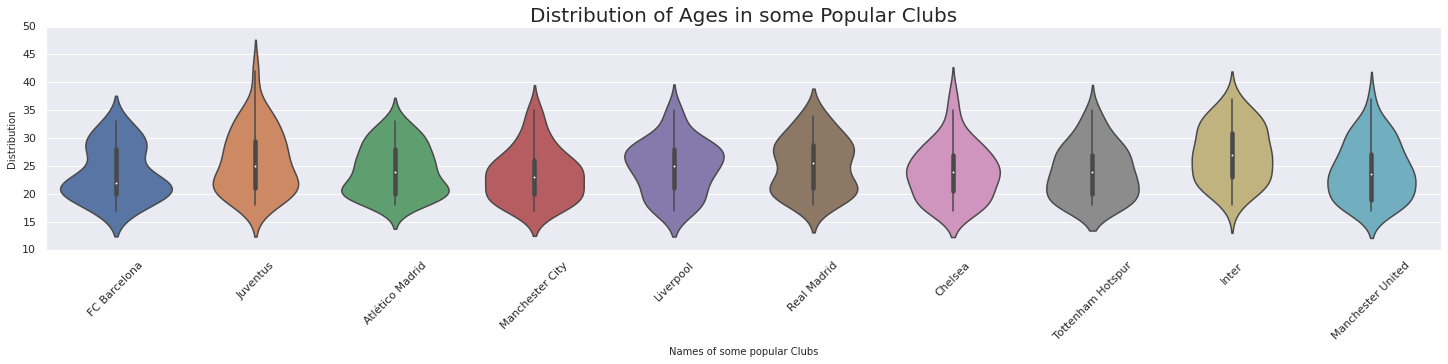

In [ ]:
data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs)]

plt.rcParams['figure.figsize'] = (25, 4)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. All the top clubs seems to have majority of the players in the age group of 20-25 years

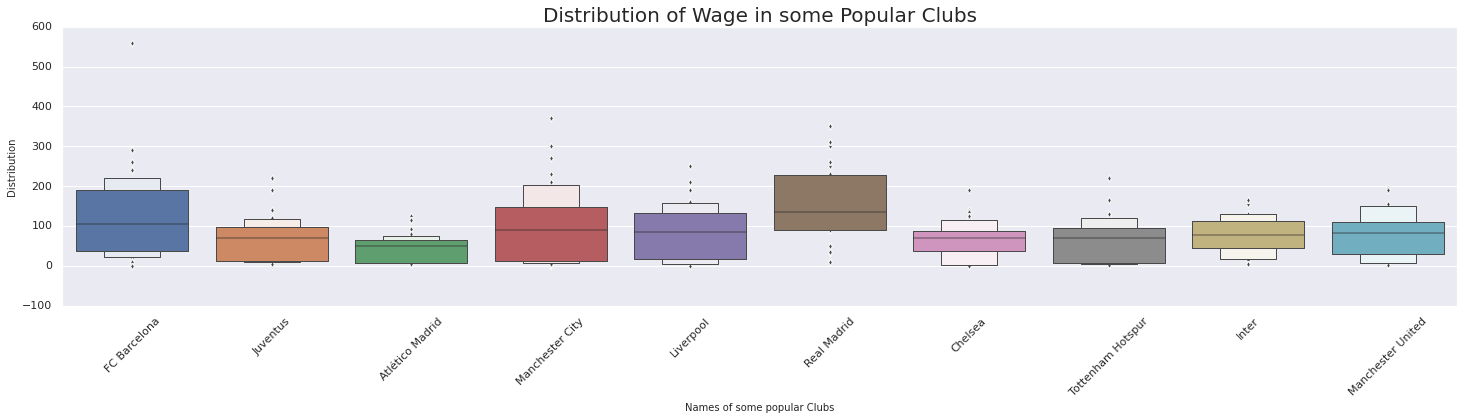

In [ ]:
# Disstribution of Wage in some Popular Clubs

data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['Wage']]

plt.rcParams['figure.figsize'] = (25, 5)
ax = sns.boxenplot(x = 'Club', y = 'Wage', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Wage in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. Real Madrid seems to pay the highest avaerage Wages for the players


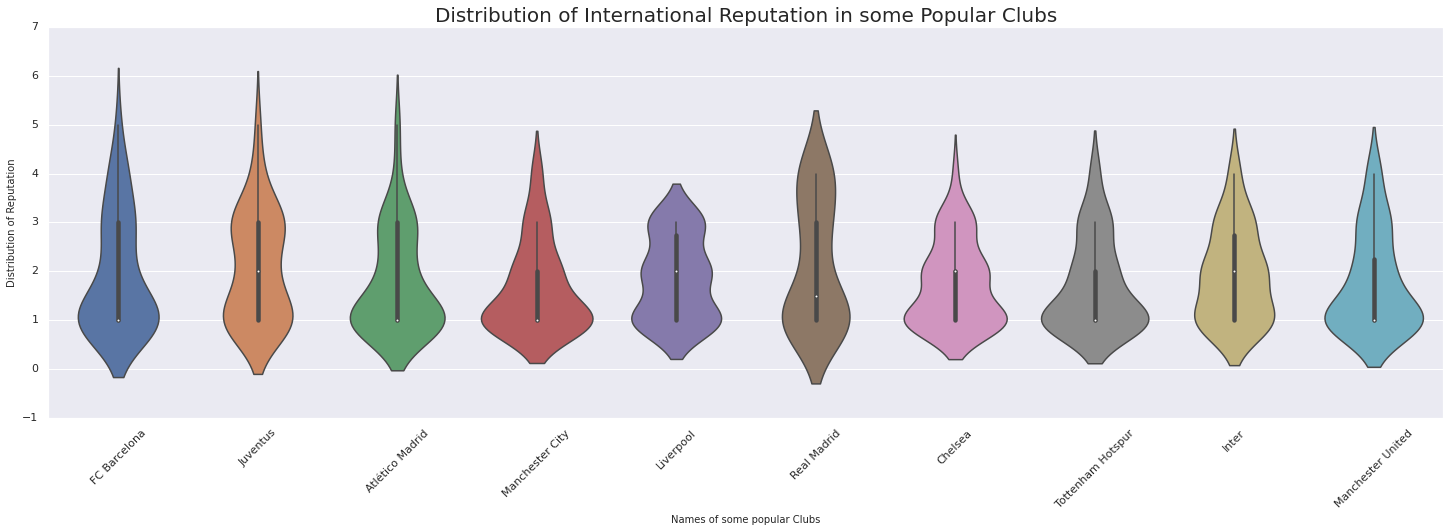

In [ ]:
# Distribution of International Reputation in some Popular Clubs

data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['International Reputation']]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Checking club with players from most unique countries

fifa_data.groupby(fifa_data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
Napoli               20
Liverpool            20
Fulham               20
Lazio                20
Everton              19
Chelsea              19
Inter                19
Nottingham Forest    19
PAOK                 19
Juventus             19
Name: Nationality, dtype: int64

In [ ]:
# Checking club with players from least unique countries

fifa_data.groupby(fifa_data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Castellammare di Stabia         1
Atlético Tucumán                1
Deportes Tolima                 1
Atlético Mineiro                1
SKA Khabarovsk                  1
Atlético Huila                  1
Atlético Clube Goianiense       1
Atlético Bucaramanga            1
CD Universidad de Concepción    1
Deportes Iquique                1
Name: Nationality, dtype: int64

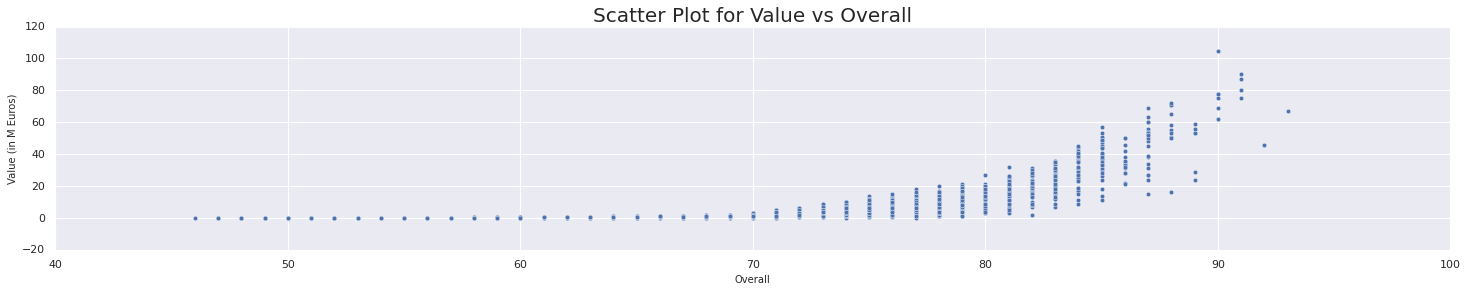

In [ ]:
# Scatter plot for Age vs Overall

fix, ax = plt.subplots(1, 1, figsize=(25, 4))
ax = sns.scatterplot(x="Overall", y="Value", data=fifa_data, ax=ax)
ax.set_xlabel(xlabel = 'Overall', fontsize = 10)
ax.set_ylabel(ylabel = 'Value (in M Euros)', fontsize = 10)
ax.set_title(label = 'Scatter Plot for Value vs Overall', fontsize = 20)
plt.show()

##### Observations:
1. The Value increases with increase in Overall score

[Text(0, 0.5, 'GK')]

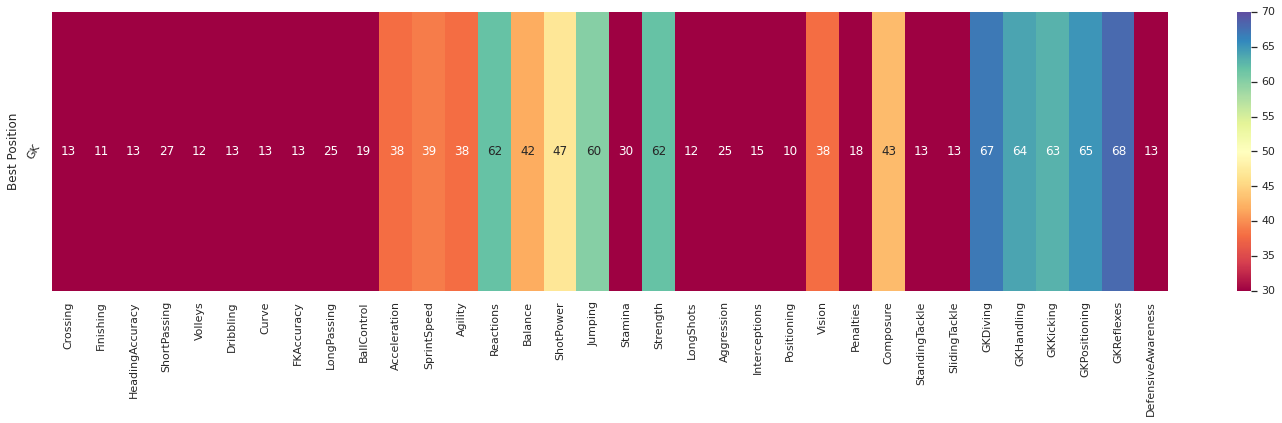

In [ ]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Goalkeeper"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Goalkeeper"]["Best Position"].unique().tolist(), rotation=60)

##### Observations:
1. "GK" have Reactions, Jumping, Strength, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes as their main attributes

[Text(0, 0.5, 'CB'), Text(0, 1.5, 'LB'), Text(0, 2.5, 'RB')]

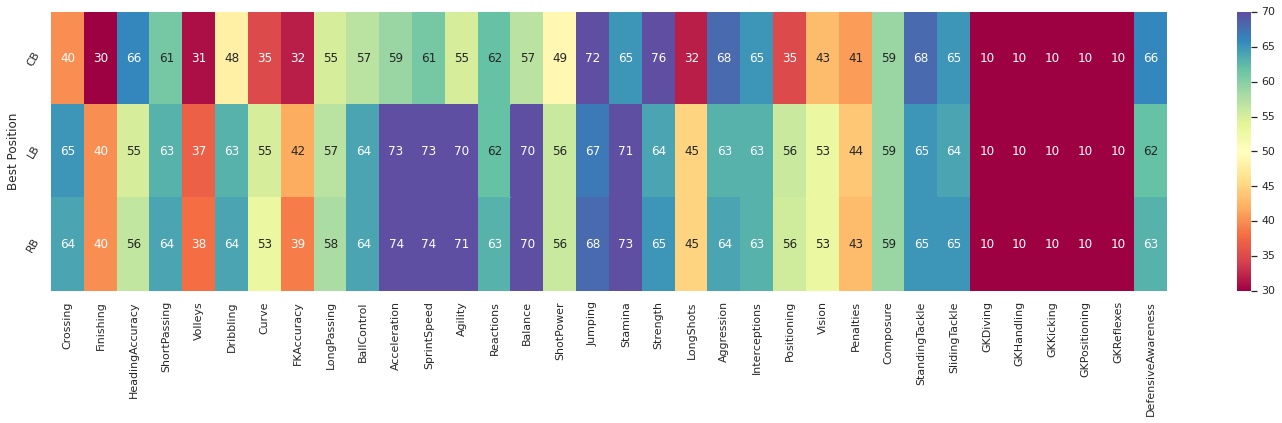

In [ ]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Defender"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Defender"]["Best Position"].unique().tolist(), rotation=60)

##### Observations:
1. "CB" have higher HeadingAccuracy, Jumping, Strength, Aggression, Interceptions, StandingTackle, SlidingTackle and DefensiveAwareness attributes
2. "LB" and "RB" have Crossing, Acceleration, SprintSpeed, Agility, Balance, Jumping, Stamina, Strength, Aggression as their major attibutes

[Text(0, 0.5, 'AM'), Text(0, 1.5, 'DM'), Text(0, 2.5, 'CM')]

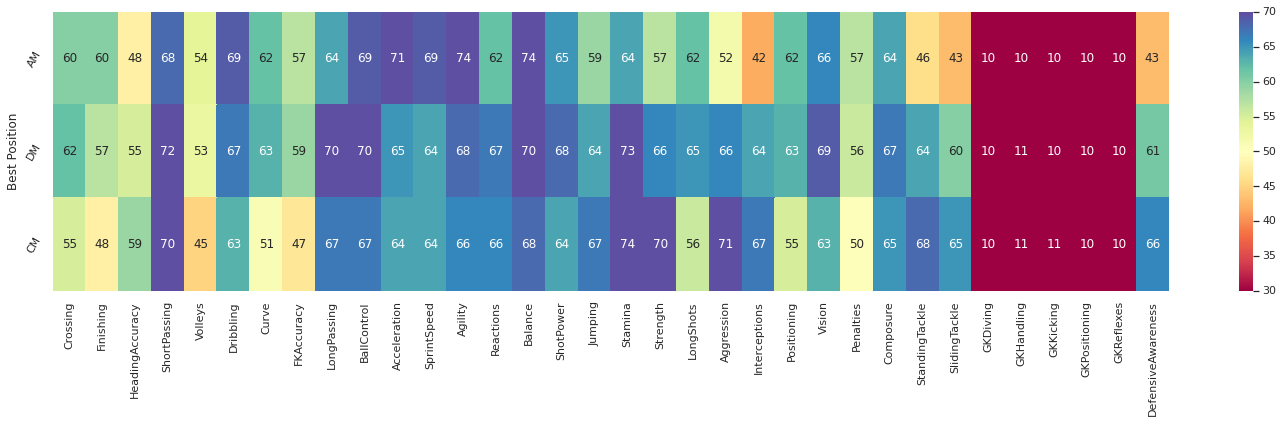

In [ ]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Midfielder"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Midfielder"]["Best Position"].unique().tolist(), rotation=60)

##### Observations:
1. "AM" have ShortPassing, Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance as the major attributes.
2. "CM" have ShortPassing, LongPassing, BallControlm Agility, Reactions, Balance, Jumping, Stamina, Strength, Aggression, Interceptions, Composure, StandingTackle, SlidingTackle as major attributes.
3. "DM" have ShortPassing, Dribbling, LongPassing, BallControl, Acceleration, Agility, Reactions, Balance, ShotPower, Stamina, Strength, LongShots, Aggression, Vision, Composure, StandingTackle, SlidingTackle, DefensiveAwareness as major attributes

[Text(0, 0.5, 'RW'), Text(0, 1.5, 'LW'), Text(0, 2.5, 'ST')]

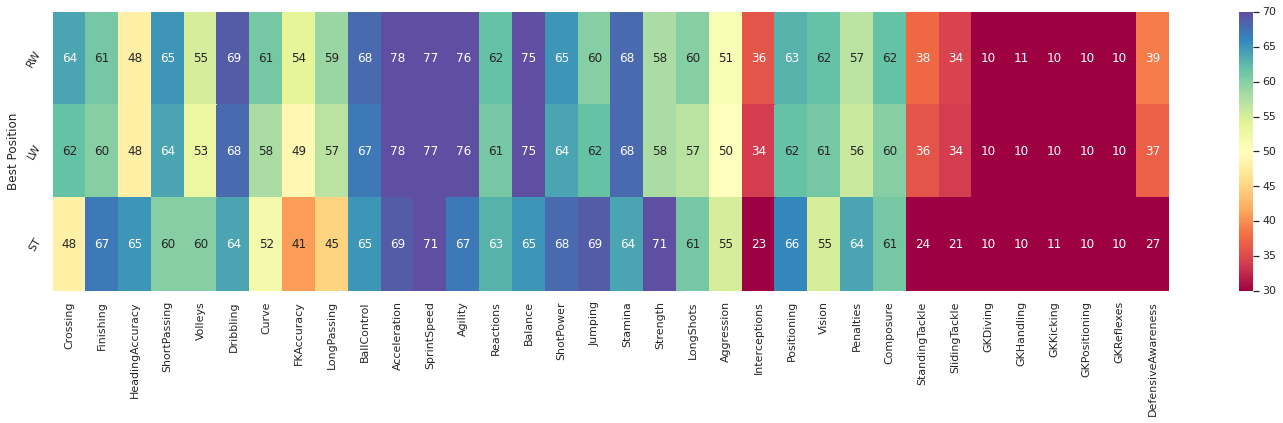

In [ ]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Forward"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Forward"]["Best Position"].unique().tolist(), rotation=60)

##### Observations:
1. "RW" and "LW" have Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance, Stamina as their main attributes
2. "ST" have Finishing, HeadingAccuracy, Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance, ShotPower, Jumping, Strength, Positioning, Penalties as their main attributes.

In [ ]:
# Showing best player for each attribute

attributes_cols = ['Overall', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                   'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                   'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 
                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'
                  ]

feature_list = []
for col in attributes_cols:
    feature_list.append(["Best " + col, fifa_data.iloc[fifa_data[col].idxmax]["Name"]])
    
niche_players = pd.DataFrame(feature_list, columns=["Feature", "Player"])
niche_players.set_index('Feature')

,Player
Feature,
Best Overall,L. Messi
Best Potential,K. Mbappé
Best Crossing,K. De Bruyne
Best Finishing,L. Messi
Best HeadingAccuracy,L. de Jong
Best ShortPassing,K. De Bruyne
Best Volleys,L. Suárez
Best Dribbling,L. Messi
Best Curve,Quaresma


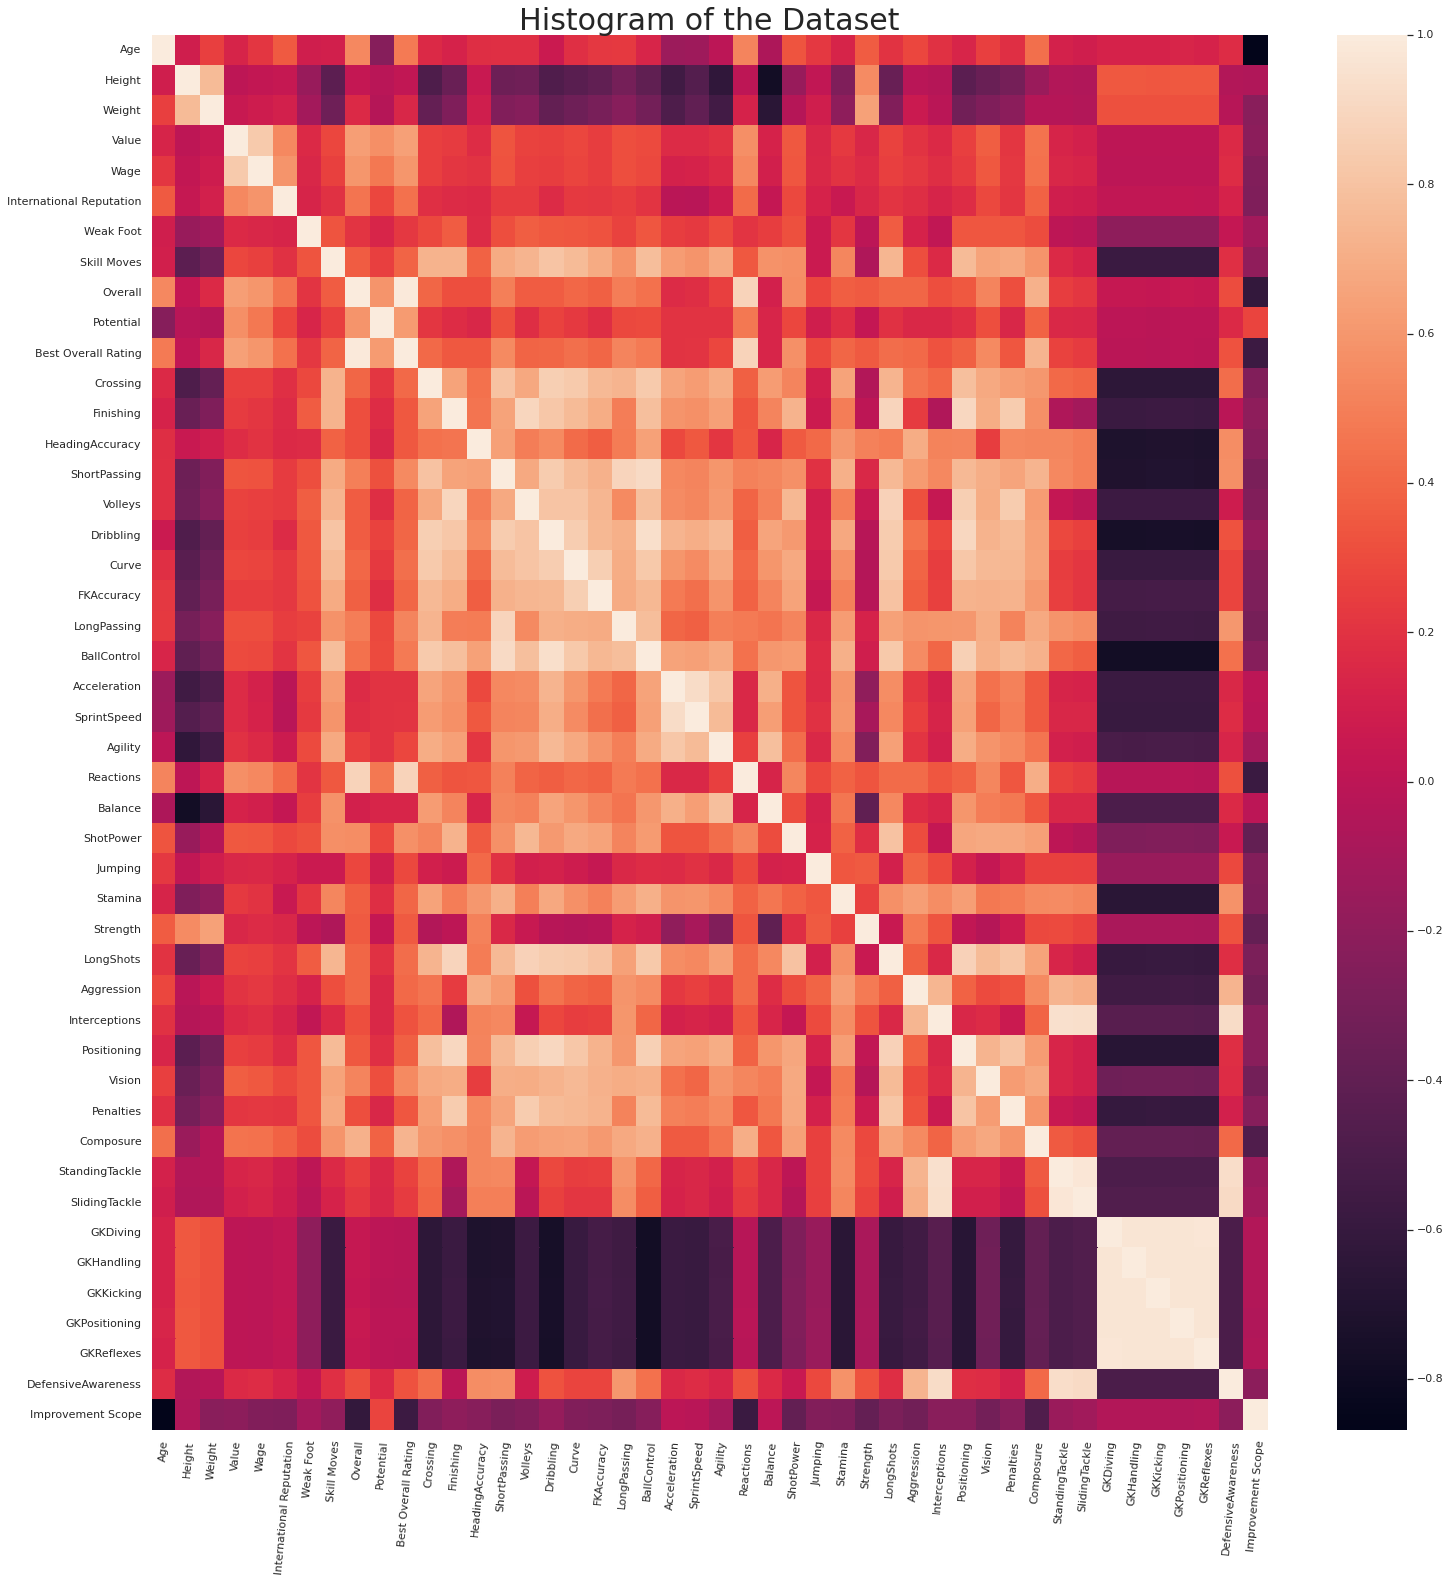

In [ ]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (25, 25)
sns.heatmap(fifa_data.corr(), annot = False)
plt.title('Histogram of the Dataset', fontsize = 30)
plt.xticks(rotation = 85)
plt.show()

In [ ]:
def PlayerOfRespectiveNationality(x):
    return fifa_data[fifa_data['Nationality'] == x]

def PlayerOfRespectiveClub(x):
    return fifa_data[fifa_data['Club'] == x]

In [ ]:
# Showing all the players from "Liverpool" which is the top valued team of FIFA 21

PlayerOfRespectiveClub("Liverpool")

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope
6,Alisson,Brazil,Liverpool,27,190.0,91.0,62.000,160.0,Goalkeeper,GK,Right,3.0,3.0,1.0,Medium/ Medium,90,91,90.0,17.0,13.0,19.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,56.0,47.0,40.0,88.0,37.0,64.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,19.0,16.0,86.0,88.0,85.0,91.0,89.0,15.0,1
7,S. Mané,Senegal,Liverpool,28,175.0,69.0,78.000,250.0,Forward,LW,Right,3.0,4.0,4.0,High/ Medium,90,90,90.0,76.0,90.0,84.0,85.0,75.0,91.0,76.0,64.0,71.0,89.0,95.0,93.0,93.0,93.0,86.0,84.0,86.0,88.0,70.0,78.0,75.0,35.0,92.0,85.0,71.0,84.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,42.0,0
9,V. van Dijk,Netherlands,Liverpool,28,193.0,92.0,75.000,210.0,Defender,CB,Right,3.0,3.0,2.0,Medium/ Medium,90,91,90.0,53.0,52.0,87.0,79.0,45.0,70.0,60.0,70.0,86.0,77.0,72.0,79.0,61.0,89.0,53.0,81.0,90.0,75.0,92.0,64.0,83.0,90.0,47.0,65.0,62.0,90.0,93.0,86.0,13.0,10.0,13.0,11.0,11.0,93.0,1
11,M. Salah,Egypt,Liverpool,28,175.0,71.0,78.000,250.0,Forward,RW,Left,3.0,3.0,4.0,High/ Medium,90,90,90.0,79.0,91.0,59.0,84.0,79.0,90.0,83.0,69.0,75.0,89.0,94.0,92.0,91.0,92.0,91.0,80.0,69.0,85.0,75.0,84.0,63.0,55.0,91.0,84.0,83.0,90.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,38.0,0
32,Fabinho,Brazil,Liverpool,26,188.0,78.0,54.000,155.0,Midfielder,DM,Right,3.0,2.0,3.0,Medium/ High,87,89,87.0,75.0,63.0,75.0,85.0,47.0,76.0,71.0,53.0,83.0,82.0,66.0,68.0,66.0,84.0,65.0,81.0,75.0,88.0,81.0,70.0,86.0,87.0,70.0,79.0,90.0,84.0,87.0,85.0,13.0,12.0,6.0,8.0,8.0,86.0,2
36,A. Robertson,Scotland,Liverpool,26,178.0,64.0,53.000,155.0,Defender,LB,Left,3.0,2.0,3.0,High/ High,87,89,87.0,90.0,57.0,67.0,82.0,32.0,80.0,82.0,38.0,76.0,82.0,79.0,85.0,78.0,84.0,74.0,78.0,62.0,95.0,65.0,65.0,85.0,82.0,77.0,79.0,55.0,83.0,84.0,81.0,11.0,8.0,10.0,7.0,14.0,83.0,2
41,T. Alexander-Arnold,England,Liverpool,21,180.0,69.0,60.000,110.0,Defender,RB,Right,2.0,4.0,3.0,High/ Medium,87,92,87.0,93.0,56.0,69.0,85.0,62.0,77.0,88.0,85.0,89.0,87.0,77.0,83.0,74.0,83.0,74.0,80.0,66.0,88.0,62.0,74.0,74.0,82.0,76.0,84.0,55.0,81.0,83.0,79.0,14.0,15.0,14.0,6.0,7.0,79.0,5
46,Roberto Firmino,Brazil,Liverpool,28,180.0,76.0,52.000,190.0,Forward,ST,Right,3.0,4.0,5.0,High/ High,87,87,87.0,73.0,80.0,75.0,87.0,85.0,90.0,81.0,65.0,76.0,91.0,78.0,77.0,85.0,90.0,86.0,82.0,81.0,88.0,74.0,77.0,75.0,58.0,86.0,86.0,72.0,88.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,60.0,0
58,J. Henderson,England,Liverpool,30,183.0,80.0,36.000,140.0,Midfielder,CM,Right,2.0,3.0,3.0,High/ High,86,86,86.0,82.0,73.0,65.0,86.0,71.0,78.0,80.0,74.0,87.0,84.0,66.0,65.0,69.0,86.0,68.0,77.0,78.0,91.0,78.0,75.0,84.0,85.0,78.0,83.0,64.0,82.0,83.0,77.0,7.0,13.0,7.0,9.0,13.0,84.0,0
77,G. Wijnaldum,Netherlands,Liverpool,29,175.0,69.0,37.000,150.0,Midfielder,CM,Right,3.0,4.0,4.0,High/ High,85,85,85.0,72.0,75.0,78.0,88.0,73.0,85.0,78.0,73.0,81.0,88.0,77.0,76.0,84.0,86.0,88.0,78.0,81.0,93.0,74.0,73.0,75.0,79.0,79.0,79.0,74.0,86.0,79.0,69.0,16.0,6.0,14.0,12.0,6.0,78.0,0


In [ ]:
# Best squad for a particular formation and club and country

def GetBestSquadBasedOnFormations(formation, data, club='', country='', age=0):

    df = data.copy()
    squad = []
    if country:
        df = df[df['Nationality'] == country]    
    if club:
        df = df[df['Club'] == club]
    if age:
        df = df[df['Age'] <= age]

    for position in formation:
        ng = df[df["Best Position"] == position]
        ng = ng.sort_values(by=["Overall", "Potential", "International Reputation"], ascending=False).reset_index()
        player = ng.iloc[0]
        index_to_drop = ng.iloc[0]["index"]
        player = player[['Best Position', 'Name', 'Club', 'Nationality', 'Age', 'Overall']]   
        squad.append(player)
        df = df.drop(index_to_drop)
    
    squad = pd.DataFrame(np.array(squad).reshape(11, 6), columns = ['Best Position', 'Name', 'Club', 'Nationality', 'Age', 'Overall'])
    return squad

In [ ]:
# popular squad formations
squad_343 = ['GK','CB','CB','CB','LB','DM','CM','RB','LW','ST','RW']

squad_433 = ['GK','LB','CB','CB','RB','DM','CM','CM','LW','ST','RW']
squad_4231 = ['GK','LB','CB','CB','RB','DM','CM','LW','AM','RW','ST']
squad_442 = ['GK','LB','CB','CB','RB','LW','DM','CM','RW','ST','ST']

In [ ]:
# Displaying the best squad for Liverpool

GetBestSquadBasedOnFormations(squad_433, fifa_data, country='', club='Liverpool')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,Alisson,Liverpool,Brazil,27,90
1,LB,A. Robertson,Liverpool,Scotland,26,87
2,CB,V. van Dijk,Liverpool,Netherlands,28,90
3,CB,J. Gomez,Liverpool,England,23,83
4,RB,T. Alexander-Arnold,Liverpool,England,21,87
5,DM,Fabinho,Liverpool,Brazil,26,87
6,CM,J. Henderson,Liverpool,England,30,86
7,CM,G. Wijnaldum,Liverpool,Netherlands,29,85
8,LW,S. Mané,Liverpool,Senegal,28,90
9,ST,Roberto Firmino,Liverpool,Brazil,28,87


In [ ]:
# Displaying the best squad for Manchester City

GetBestSquadBasedOnFormations(squad_4231, fifa_data, country='', club='Manchester City')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,Ederson,Manchester City,Brazil,26,88
1,LB,B. Mendy,Manchester City,France,25,81
2,CB,A. Laporte,Manchester City,France,26,87
3,CB,Fernandinho,Manchester City,Brazil,35,84
4,RB,K. Walker,Manchester City,England,30,85
5,DM,Rodri,Manchester City,Spain,24,85
6,CM,I. Gündoğan,Manchester City,Germany,29,83
7,LW,R. Sterling,Manchester City,England,25,88
8,AM,K. De Bruyne,Manchester City,Belgium,29,91
9,RW,Bernardo Silva,Manchester City,Portugal,25,87


In [ ]:
# Displaying the best squad for Germany

GetBestSquadBasedOnFormations(squad_4231, fifa_data, country='Germany')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,M. ter Stegen,FC Barcelona,Germany,28,90
1,LB,M. Halstenberg,RB Leipzig,Germany,28,82
2,CB,M. Hummels,Borussia Dortmund,Germany,31,86
3,CB,N. Süle,FC Bayern München,Germany,24,84
4,RB,L. Bender,Bayer 04 Leverkusen,Germany,31,82
5,DM,J. Kimmich,FC Bayern München,Germany,25,88
6,CM,T. Kroos,Real Madrid,Germany,30,88
7,LW,L. Sané,FC Bayern München,Germany,24,85
8,AM,T. Müller,FC Bayern München,Germany,30,86
9,RW,S. Gnabry,FC Bayern München,Germany,24,85


In [ ]:
# Displaying the best squad 

GetBestSquadBasedOnFormations(squad_4231, fifa_data)

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,J. Oblak,Atlético Madrid,Slovenia,27,91
1,LB,A. Robertson,Liverpool,Scotland,26,87
2,CB,V. van Dijk,Liverpool,Netherlands,28,90
3,CB,Sergio Ramos,Real Madrid,Spain,34,89
4,RB,T. Alexander-Arnold,Liverpool,England,21,87
5,DM,Casemiro,Real Madrid,Brazil,28,89
6,CM,T. Kroos,Real Madrid,Germany,30,88
7,LW,Cristiano Ronaldo,Juventus,Portugal,35,92
8,AM,K. De Bruyne,Manchester City,Belgium,29,91
9,RW,L. Messi,FC Barcelona,Argentina,33,93


In [ ]:
# Displaying the best squad u21

GetBestSquadBasedOnFormations(squad_4231, fifa_data, age=21)

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,G. Donnarumma,Milan,Italy,21,85
1,LB,A. Davies,FC Bayern München,Canada,19,81
2,CB,M. de Ligt,Juventus,Netherlands,20,85
3,CB,D. Upamecano,RB Leipzig,France,21,79
4,RB,T. Alexander-Arnold,Liverpool,England,21,87
5,DM,Rosberto Dourado,Atlético Mineiro,Brazil,20,81
6,CM,F. Valverde,Real Madrid,Uruguay,21,83
7,LW,Cucurella,Getafe CF,Spain,21,81
8,AM,K. Havertz,Chelsea,Germany,21,85
9,RW,J. Sancho,Borussia Dortmund,England,20,87


In [ ]:
fifa_data.head(12)

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope
0,L. Messi,Argentina,FC Barcelona,33,170.0,72.0,67.0,560.0,Forward,RW,Left,5.0,4.0,4.0,Medium/ Low,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,32.0,0
1,Cristiano Ronaldo,Portugal,Juventus,35,188.0,83.0,46.0,220.0,Forward,LW,Right,5.0,4.0,5.0,High/ Low,92,92,92.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,28.0,0
2,R. Lewandowski,Poland,FC Bayern München,31,183.0,80.0,80.0,240.0,Forward,ST,Right,4.0,4.0,4.0,High/ Medium,91,91,91.0,71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0,0
3,Neymar Jr,Brazil,Paris Saint-Germain,28,175.0,68.0,90.0,270.0,Forward,LW,Right,5.0,5.0,5.0,High/ Medium,91,91,91.0,85.0,87.0,62.0,87.0,87.0,95.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0,0
4,J. Oblak,Slovenia,Atlético Madrid,27,188.0,87.0,75.0,125.0,Goalkeeper,GK,Right,3.0,3.0,1.0,Medium/ Medium,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0,2
5,K. De Bruyne,Belgium,Manchester City,29,180.0,70.0,87.0,370.0,Midfielder,AM,Right,4.0,5.0,4.0,High/ High,91,91,91.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0,0
6,Alisson,Brazil,Liverpool,27,190.0,91.0,62.0,160.0,Goalkeeper,GK,Right,3.0,3.0,1.0,Medium/ Medium,90,91,90.0,17.0,13.0,19.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,56.0,47.0,40.0,88.0,37.0,64.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,19.0,16.0,86.0,88.0,85.0,91.0,89.0,15.0,1
7,S. Mané,Senegal,Liverpool,28,175.0,69.0,78.0,250.0,Forward,LW,Right,3.0,4.0,4.0,High/ Medium,90,90,90.0,76.0,90.0,84.0,85.0,75.0,91.0,76.0,64.0,71.0,89.0,95.0,93.0,93.0,93.0,86.0,84.0,86.0,88.0,70.0,78.0,75.0,35.0,92.0,85.0,71.0,84.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,42.0,0
8,M. ter Stegen,Germany,FC Barcelona,28,188.0,85.0,69.0,260.0,Goalkeeper,GK,Right,3.0,4.0,1.0,Medium/ Medium,90,93,90.0,18.0,14.0,11.0,61.0,14.0,21.0,18.0,12.0,63.0,30.0,38.0,50.0,37.0,86.0,43.0,66.0,79.0,35.0,78.0,10.0,43.0,22.0,11.0,70.0,25.0,70.0,13.0,10.0,88.0,85.0,88.0,88.0,90.0,25.0,3
9,V. van Dijk,Netherlands,Liverpool,28,193.0,92.0,75.0,210.0,Defender,CB,Right,3.0,3.0,2.0,Medium/ Medium,90,91,90.0,53.0,52.0,87.0,79.0,45.0,70.0,60.0,70.0,86.0,77.0,72.0,79.0,61.0,89.0,53.0,81.0,90.0,75.0,92.0,64.0,83.0,90.0,47.0,65.0,62.0,90.0,93.0,86.0,13.0,10.0,13.0,11.0,11.0,93.0,1


### **3.3 Feature Engineering**


#### **3.3.1 Feature Scaling**


In [ ]:
sc = MinMaxScaler()

In [ ]:
# Scaling the attribute features

features_to_scale = [ 'Overall', 'Crossing', 'Finishing',
                      'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                      'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                      'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                      'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                      'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'
                    ]

attributes_scaled = sc.fit_transform(fifa_data[features_to_scale].values)

#### **3.3.2 Feature Encoding**

In [ ]:
# Label Encoded the Work Rate and Prefered Foot

work_rate_dict = {'Medium/ Medium': 4, 'High/ Low': 4, 'High/ Medium': 6, 'High/ High': 9,
                  'Medium/ High': 6, 'Medium/ Low': 2, 'Low/ High': 4, 'Low/ Medium': 2, 'Low/ Low': 1
                 }

fifa_data['Work Rate'] = fifa_data['Work Rate'].map(work_rate_dict)

In [ ]:
fifa_data["Preferred Foot"] = fifa_data["Preferred Foot"].map({"Left": 0, "Right":1})

In [ ]:
# OHE for the best position

le1 = LabelEncoder()
best_position = le1.fit_transform(fifa_data["Best Position"])

ohe1 = OneHotEncoder()
best_position_ohe = ohe1.fit_transform(best_position.reshape(-1,1))
best_position_ohe = pd.DataFrame(best_position_ohe.toarray(), columns = ["Best_Position_" + col for col in le1.classes_])

#### **3.3.3 Feature Selection**

In [ ]:
# Prepared the dataframe for Clustering algorithms

X = pd.concat([best_position_ohe, fifa_data[["Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves", "Work Rate"]], pd.DataFrame(attributes_scaled, columns=features_to_scale)], axis=1)

## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited algorithm.

In [ ]:
# Building and fitting the model with MiniBatchKMeans 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {}
K = range(10,201) 

for k in K: 
    kmeanModel = MiniBatchKMeans(n_clusters = k, batch_size=2000) 
    kmeanModel.fit(X.values)     
  
    distortions.append(sum(np.min(cdist(X.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)   

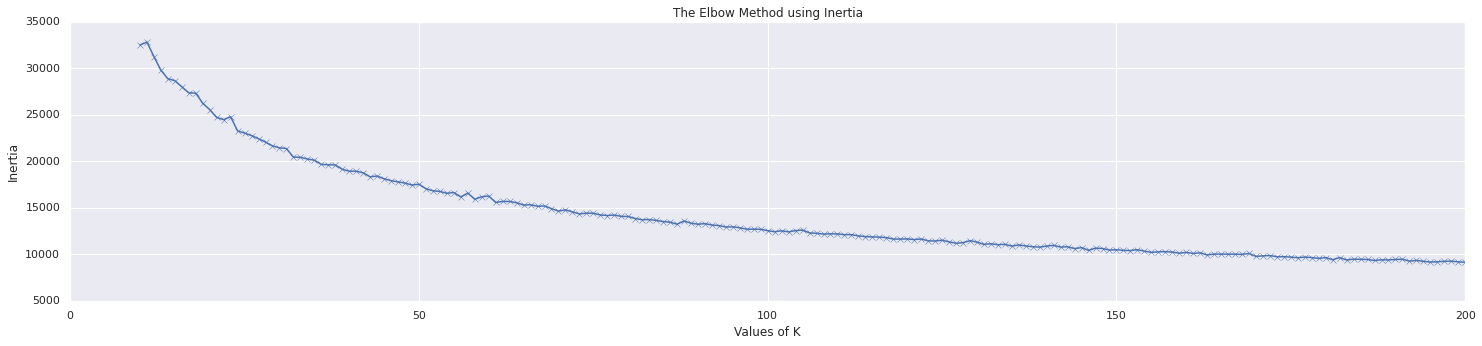

In [ ]:
plt.rcParams['figure.figsize'] = (25, 5)
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

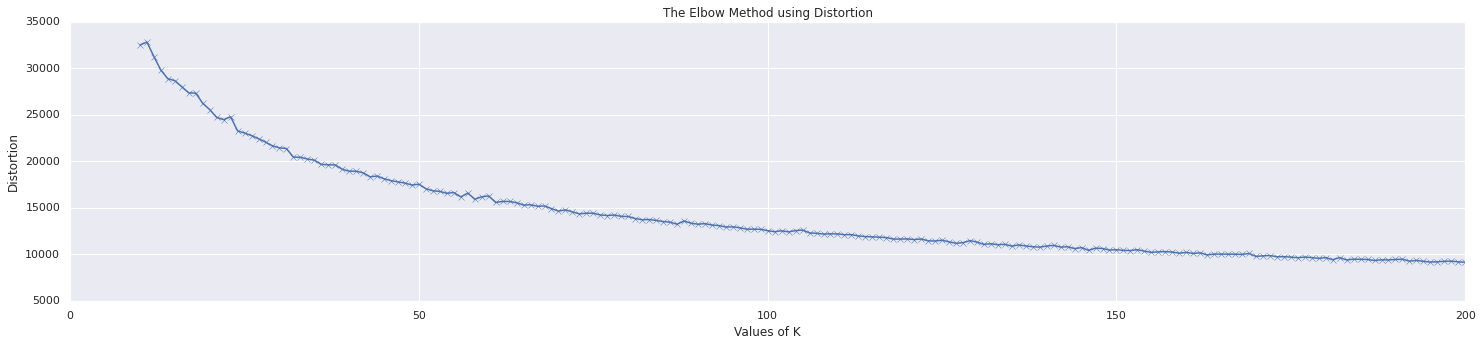

In [ ]:
plt.rcParams['figure.figsize'] = (25, 5)
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [ ]:
# Taking k=50

kmeanModel = MiniBatchKMeans(n_clusters = 50, batch_size=4000) 
kmeanModel.fit(X.values)     
predicted_cluster = kmeanModel.predict(X.values)
kmeanModel.labels_

array([26, 26, 36, ...,  7, 23, 31], dtype=int32)

In [ ]:
silhouette_avg = metrics.silhouette_score(X.values, predicted_cluster)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.23925573468576095


In [ ]:
fifa_data["KMeans Label"] = predicted_cluster

In [ ]:
bandwidth = estimate_bandwidth(X.values, quantile=0.4, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X.values)
predicted_cluster2 = ms.predict(X.values)

In [ ]:
fifa_data["MeanShift Label"] = predicted_cluster2

In [ ]:
db = DBSCAN()
predicted_cluster3 = db.fit_predict(X.values)

In [ ]:
fifa_data["DBSCAN Label"] = predicted_cluster3

In [ ]:
op = OPTICS()
predicted_cluster4 = op.fit_predict(X.values)
fifa_data["OPTICS Label"] = predicted_cluster4

In [ ]:
ac = AgglomerativeClustering(n_clusters = 75)
predicted_cluster5 = ac.fit_predict(X.values)
fifa_data["AGG Label"] = predicted_cluster5

In [ ]:
#afc = AffinityPropagation()
#predicted_cluster6 = afc.fit_predict(X.values)
#fifa_data["AFF Label"] = predicted_cluster6

In [ ]:
spec_cluster = SpectralClustering(n_clusters = 50)
predicted_cluster6 = spec_cluster.fit_predict(X.values)
fifa_data["SC Label"] = predicted_cluster6

In [ ]:
def DisplayTopTenSimilarPlayers(name, label="KMeans Label"):
    names = fifa_data["Name"]
    matches = process.extract(name, names, scorer=fuzz.partial_ratio)
    if len(matches) == 0:
        return "No Match Found"
    cluster = fifa_data.iloc[matches[0][2]][label]
    return fifa_data[(fifa_data[label] == cluster) & (fifa_data.index != matches[0][2])].head(10)[['Name', 'Nationality', 'Club', 'Age', 'Best Position', 'Overall']]

In [ ]:
DisplayTopTenSimilarPlayers("Cavani", "AGG Label")

,Name,Nationality,Club,Age,Best Position,Overall
5,K. De Bruyne,Belgium,Manchester City,29,AM,91
12,Casemiro,Brazil,Real Madrid,28,DM,89
24,H. Kane,England,Tottenham Hotspur,26,ST,88
34,P. Aubameyang,Gabon,Arsenal,31,ST,87
35,Bernardo Silva,Portugal,Manchester City,25,RW,87
36,A. Robertson,Scotland,Liverpool,26,LB,87
38,H. Son,Korea Republic,Tottenham Hotspur,27,LW,87
46,Roberto Firmino,Brazil,Liverpool,28,ST,87
50,T. Müller,Germany,FC Bayern München,30,AM,86
55,M. Hummels,Germany,Borussia Dortmund,31,CB,86


In [ ]:
fifa_data.head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope,KMeans Label,MeanShift Label,DBSCAN Label,OPTICS Label,AGG Label,SC Label
0,L. Messi,Argentina,FC Barcelona,33,170.0,72.0,67.0,560.0,Forward,RW,0,5.0,4.0,4.0,2,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,32.0,0,26,0,-1,-1,2,4
1,Cristiano Ronaldo,Portugal,Juventus,35,188.0,83.0,46.0,220.0,Forward,LW,1,5.0,4.0,5.0,4,92,92,92.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,28.0,0,26,0,-1,-1,46,28
2,R. Lewandowski,Poland,FC Bayern München,31,183.0,80.0,80.0,240.0,Forward,ST,1,4.0,4.0,4.0,6,91,91,91.0,71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0,0,36,0,-1,-1,46,1
3,Neymar Jr,Brazil,Paris Saint-Germain,28,175.0,68.0,90.0,270.0,Forward,LW,1,5.0,5.0,5.0,6,91,91,91.0,85.0,87.0,62.0,87.0,87.0,95.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0,0,36,0,-1,-1,46,36
4,J. Oblak,Slovenia,Atlético Madrid,27,188.0,87.0,75.0,125.0,Goalkeeper,GK,1,3.0,3.0,1.0,4,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0,2,23,0,0,330,62,19
